# Creating matrices for pairs of labels

## Which ones?

- Sequence-based ML model F1 scores
- Sequence similarity scores
- annotation similarity scores
- annotation overlap

## For which dataset?

- First for yeast because of conference

In [1]:
from subpred.util import load_df
import networkx as nx
import re
import pandas as pd
from subpred.transmembrane_transporters import get_transmembrane_transporter_dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joblib import Parallel, delayed

In [2]:
df_sequences, df_uniprot_goa, df_go_chebi = get_transmembrane_transporter_dataset(
    organism_ids={559292},
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=1,
)
display(df_sequences)
display(df_uniprot_goa)
display(df_go_chebi)
# TODO what about part_of relations?

sequence  reviewed  \
Uniprot                                                                
P00401   MVQRWLYSTNAKDIAVLYFMLAIFSGMAGTAMSLIIRLELAAPGSQ...      True   
P00830   MVLPRLYTATSRAAFKAAKQSAPLLSTSWKRCMASAAQSTPITGKV...      True   
P04817   MTNSKEDADIEEKHMYNEPVTTLFHDVEASQTHHRRGSIPLKDEKS...      True   
P07213   MKSFITRNKTAILATVAATGTAIGAYYYYNQLQQQQQRGKKNTINK...      True   
P14906   MPTNYEYDEASETWPSFILTGLLMVVGPMTLLQIYQIFFGANAEDG...      True   
...                                                    ...       ...   
P39542   MFQQLSASIRHNAHIIFLCISWYFISSLASQVTKQVLTVCPLPLFL...      True   
Q05497   MAGILSKTLSEVHPSLRTNGMGIGNTHRRISLGFLPPNKKNPLVRK...      True   
P38318   MEPKRKSGSLAKHDLPQFYLLIMLYLAQGIPVGLAFGTVPFLLKSL...      True   
P46996   MSNEDETTRLMSSDEMDYLLETAGINALEEIISQNDSTGINLDTNE...      True   
P47159   MAPEIFVKFKCASRDIKLLWASVFLRLLSYGLTNQVLTLFLNAINM...      True   

         protein_existence  organism_id  \
Uniprot                                   
P00401                   1       559292   
P00830                   1       559292   
P04817                   1       559292   
P07213                   1       559292   
P14906                   1       559292   
...                    ...          ...   
P39542                   1       559292   
Q05497                   1       559292   
P38318                   1       559292   
P46996                   1       559292   
P47159                   1       559292   

                                             protein_names  
Uniprot                                                     
P00401   Cytochrome c oxidase subunit 1 (EC 7.1.1.9) (C...  
P00830   ATP synthase subunit beta, mitochondrial (EC 7...  
P04817   Arginine permease CAN1 (Canavanine resistance ...  
P07213   Mitochondrial import receptor subunit TOM70 (7...  
P14906   Protein translocation protein SEC63 (Protein N...  
...                                                    ...  
P39542                 Uncharacterized transporter YJL193W  
Q05497                 Uncharacterized transporter YDR338C  
P38318            Uncharacterized membrane protein YBR220C  
P46996            Uncharacterized membrane protein YJL163C  
P47159            Uncharacterized membrane protein YJR124C  

[332 rows x 5 columns]

Uniprot qualifier       go_id                                 go_term  \
0     D6W196   enables  GO:0005347  ATP transmembrane transporter activity   
1     D6W196   enables  GO:0005347  ATP transmembrane transporter activity   
2     D6W196   enables  GO:0005347  ATP transmembrane transporter activity   
3     D6W196   enables  GO:0005347  ATP transmembrane transporter activity   
4     D6W196   enables  GO:0005347  ATP transmembrane transporter activity   
...      ...       ...         ...                                     ...   
7732  Q9ZZX1   enables  GO:0004129           cytochrome-c oxidase activity   
7733  Q9ZZX1   enables  GO:0004129           cytochrome-c oxidase activity   
7734  Q9ZZX1   enables  GO:0004129           cytochrome-c oxidase activity   
7735  Q9ZZX1   enables  GO:0004129           cytochrome-c oxidase activity   
7736  Q9ZZX1   enables  GO:0004129           cytochrome-c oxidase activity   

     evidence_code aspect go_id_ancestor  \
0              IBA      F     GO:0022857   
1              IBA      F     GO:0015932   
2              IBA      F     GO:0005347   
3              IBA      F     GO:1901702   
4              IBA      F     GO:0015215   
...            ...    ...            ...   
7732           IEA      F     GO:0022804   
7733           IEA      F     GO:0022890   
7734           IEA      F     GO:0015399   
7735           IEA      F     GO:0004129   
7736           IEA      F     GO:0022857   

                                       go_term_ancestor  
0                    transmembrane transporter activity  
1     nucleobase-containing compound transmembrane t...  
2                ATP transmembrane transporter activity  
3               salt transmembrane transporter activity  
4         nucleotide transmembrane transporter activity  
...                                                 ...  
7732          active transmembrane transporter activity  
7733  inorganic cation transmembrane transporter act...  
7734  primary active transmembrane transporter activity  
7735                      cytochrome-c oxidase activity  
7736                 transmembrane transporter activity  

[7737 rows x 8 columns]

go_id                                            go_term  \
0    GO:0000064     L-ornithine transmembrane transporter activity   
1    GO:0000095  S-adenosyl-L-methionine transmembrane transpor...   
2    GO:0000099  sulfur amino acid transmembrane transporter ac...   
3    GO:0000100  S-methylmethionine transmembrane transporter a...   
4    GO:0000102  L-methionine secondary active transmembrane tr...   
..          ...                                                ...   
379  GO:1901682  sulfur compound transmembrane transporter acti...   
380  GO:1902557  5'-adenylyl sulfate transmembrane transporter ...   
381  GO:1903089  5-amino-1-ribofuranosylimidazole-4-carboxamide...   
382  GO:1903425        fluoride transmembrane transporter activity   
383  GO:1904680         peptide transmembrane transporter activity   

        chebi_id                          chebi_term  chebi_go_relation  
0    CHEBI:46911                   L-ornithinium(1+)  has_primary_input  
1    CHEBI:59789  S-adenosyl-L-methionine zwitterion  has_primary_input  
2    CHEBI:26834        sulfur-containing amino acid  has_primary_input  
3    CHEBI:58252    S-methyl-L-methionine zwitterion  has_primary_input  
4    CHEBI:57844             L-methionine zwitterion  has_primary_input  
..           ...                                 ...                ...  
379  CHEBI:26835             sulfur molecular entity  has_primary_input  
380  CHEBI:58243             5'-adenylyl sulfate(2-)  has_primary_input  
381  CHEBI:28498                           acadesine  has_primary_input  
382  CHEBI:17051                            fluoride  has_primary_input  
383  CHEBI:16670                             peptide  has_primary_input  

[384 rows x 5 columns]

## Adjacency matrix

In [33]:
def get_adjacency_matrix(graph, labels: list, edges_filter: set = {"is_a"}):
    subgraph = graph.edge_subgraph(
        [edge for edge in graph.edges(keys=True) if edge[2] in edges_filter]
    )
    assert len(labels) == len(set(labels)), "labels should only contain unique elements"
    subgraph = subgraph.subgraph(labels)

    # scipy sparse matrix
    df_adjacency_matrix = nx.adjacency_matrix(G=subgraph, nodelist=labels)

    df_adjacency_matrix = pd.DataFrame(
        df_adjacency_matrix.todense(), columns=labels, index=labels
    )
    return df_adjacency_matrix

### GO adjacency

In [34]:
graph_go = load_df("go_obo")
go_ids = sorted(df_uniprot_goa.go_id_ancestor.unique())
df_adj_matrix_go = get_adjacency_matrix(graph_go, labels=go_ids, edges_filter={"is_a"})
df_adj_matrix_go

GO:0000006  GO:0000007  GO:0000064  GO:0000095  GO:0000099  \
GO:0000006           0           0           0           0           0   
GO:0000007           0           0           0           0           0   
GO:0000064           0           0           0           0           0   
GO:0000095           0           0           0           0           0   
GO:0000099           0           0           0           0           0   
...                ...         ...         ...         ...         ...   
GO:1901702           0           0           0           0           0   
GO:1902557           0           0           0           0           0   
GO:1903089           0           0           0           0           0   
GO:1903425           0           0           0           0           0   
GO:1904680           0           0           0           0           0   

            GO:0000100  GO:0000102  GO:0000295  GO:0000297  GO:0000319  ...  \
GO:0000006           0           0           0           0           0  ...   
GO:0000007           0           0           0           0           0  ...   
GO:0000064           0           0           0           0           0  ...   
GO:0000095           0           0           0           0           0  ...   
GO:0000099           0           0           0           0           0  ...   
...                ...         ...         ...         ...         ...  ...   
GO:1901702           0           0           0           0           0  ...   
GO:1902557           0           0           1           0           0  ...   
GO:1903089           0           0           0           0           0  ...   
GO:1903425           0           0           0           0           0  ...   
GO:1904680           0           0           0           0           0  ...   

            GO:1901474  GO:1901505  GO:1901618  GO:1901680  GO:1901682  \
GO:0000006           0           0           0           0           0   
GO:0000007           0           0           0           0           0   
GO:0000064           0           0           0           0           0   
GO:0000095           0           0           0           0           1   
GO:0000099           0           0           0           0           1   
...                ...         ...         ...         ...         ...   
GO:1901702           0           0           0           0           0   
GO:1902557           0           0           0           0           1   
GO:1903089           1           1           0           0           0   
GO:1903425           0           0           0           0           0   
GO:1904680           0           0           0           0           0   

            GO:1901702  GO:1902557  GO:1903089  GO:1903425  GO:1904680  
GO:0000006           0           0           0           0           0  
GO:0000007           0           0           0           0           0  
GO:0000064           0           0           0           0           0  
GO:0000095           0           0           0           0           0  
GO:0000099           0           0           0           0           0  
...                ...         ...         ...         ...         ...  
GO:1901702           0           0           0           0           0  
GO:1902557           0           0           0           0           0  
GO:1903089           0           0           0           0           0  
GO:1903425           1           0           0           0           0  
GO:1904680           0           0           0           0           0  

[288 rows x 288 columns]

### ChEBI adjacency

In [35]:
graph_chebi = load_df("chebi_obo")
chebi_id_primary = sorted(
    df_go_chebi[df_go_chebi.chebi_go_relation == "has_primary_input"].chebi_id.unique()
)
df_adj_matrix_chebi = get_adjacency_matrix(
    graph_chebi.copy(), labels=chebi_id_primary, edges_filter={"is_a"}
)
df_adj_matrix_chebi

CHEBI:13389  CHEBI:15354  CHEBI:15361  CHEBI:15377  CHEBI:15595  \
CHEBI:13389            0            0            0            0            0   
CHEBI:15354            0            0            0            0            0   
CHEBI:15361            0            0            0            0            0   
CHEBI:15377            0            0            0            0            0   
CHEBI:15595            0            0            0            0            0   
...                  ...          ...          ...          ...          ...   
CHEBI:63299            0            0            0            0            0   
CHEBI:64709            0            0            0            0            0   
CHEBI:68452            0            0            0            0            0   
CHEBI:77847            0            0            0            0            0   
CHEBI:83821            0            0            0            0            0   

             CHEBI:15676  CHEBI:15792  CHEBI:15927  CHEBI:16189  CHEBI:16199  \
CHEBI:13389            0            0            0            0            0   
CHEBI:15354            0            0            0            0            0   
CHEBI:15361            0            0            0            0            0   
CHEBI:15377            0            0            0            0            0   
CHEBI:15595            0            0            0            0            0   
...                  ...          ...          ...          ...          ...   
CHEBI:63299            0            0            0            0            0   
CHEBI:64709            0            0            0            0            0   
CHEBI:68452            0            0            0            0            0   
CHEBI:77847            0            0            0            0            0   
CHEBI:83821            0            0            0            0            0   

             ...  CHEBI:61109  CHEBI:61292  CHEBI:61293  CHEBI:61336  \
CHEBI:13389  ...            0            0            0            0   
CHEBI:15354  ...            0            0            0            0   
CHEBI:15361  ...            0            0            0            0   
CHEBI:15377  ...            0            0            0            0   
CHEBI:15595  ...            0            0            0            1   
...          ...          ...          ...          ...          ...   
CHEBI:63299  ...            0            0            0            0   
CHEBI:64709  ...            0            0            0            0   
CHEBI:68452  ...            0            0            0            0   
CHEBI:77847  ...            0            0            0            0   
CHEBI:83821  ...            0            0            0            0   

             CHEBI:63063  CHEBI:63299  CHEBI:64709  CHEBI:68452  CHEBI:77847  \
CHEBI:13389            0            0            0            0            0   
CHEBI:15354            0            0            0            0            0   
CHEBI:15361            0            0            0            0            0   
CHEBI:15377            0            0            0            0            0   
CHEBI:15595            0            0            0            0            0   
...                  ...          ...          ...          ...          ...   
CHEBI:63299            0            0            0            0            0   
CHEBI:64709            0            0            0            0            0   
CHEBI:68452            0            0            0            0            0   
CHEBI:77847            0            0            0            0            0   
CHEBI:83821            0            0            0            0            0   

             CHEBI:83821  
CHEBI:13389            0  
CHEBI:15354            0  
CHEBI:15361            0  
CHEBI:15377            0  
CHEBI:15595            0  
...                  ...  
CHEBI:63299            0  
CHEBI:64709            0  
CHEBI:68452           

## Chemical similarity

Here, we are using the morgan fingerprints. There are other options that might be better:


In [36]:
from subpred.chemical_similarity import get_pairwise_similarity

methods = [
    "morgan",
    "atompairs",
    "torsions",
    "maccs",
]

chebi_ids_primary = df_go_chebi[
    df_go_chebi.chebi_go_relation == "has_primary_input"
].chebi_id.unique()

for method in methods:
    print(method)
    df_tanimoto = get_pairwise_similarity(chebi_ids_primary, fingerprint_method=method)
    display(df_tanimoto)

morgan


[14:22:53] WARNING: not removing hydrogen atom without neighbors


chebi_id     CHEBI:46911  CHEBI:59789  CHEBI:58252  CHEBI:57844  CHEBI:45725  \
chebi_id                                                                       
CHEBI:46911     1.000000     0.218750     0.500000     0.500000     0.222222   
CHEBI:59789     0.218750     1.000000     0.311475     0.230769     0.028986   
CHEBI:58252     0.500000     0.311475     1.000000     0.517241     0.060606   
CHEBI:57844     0.500000     0.230769     0.517241     1.000000     0.060606   
CHEBI:45725     0.222222     0.028986     0.060606     0.060606     1.000000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.212121     0.130435     0.235294     0.235294     0.031250   
CHEBI:15792     0.250000     0.096774     0.230769     0.230769     0.045455   
CHEBI:58243     0.057143     0.493333     0.055556     0.055556     0.015152   
CHEBI:28498     0.074074     0.352113     0.071429     0.071429     0.020000   
CHEBI:17051     0.000000     0.000000     0.000000     0.000000     0.000000   

chebi_id     CHEBI:17359  CHEBI:77847  CHEBI:57966  CHEBI:29108  CHEBI:17996  \
chebi_id                                                                       
CHEBI:46911     0.083333     0.125000     0.360000          0.0          0.0   
CHEBI:59789     0.032258     0.064103     0.107692          0.0          0.0   
CHEBI:58252     0.076923     0.119048     0.241379          0.0          0.0   
CHEBI:57844     0.076923     0.119048     0.241379          0.0          0.0   
CHEBI:45725     0.000000     0.027027     0.173913          0.0          0.0   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.083333     0.184211     0.259259          0.0          0.0   
CHEBI:15792     0.142857     0.129032     0.411765          0.0          0.0   
CHEBI:58243     0.034483     0.144928     0.062500          0.0          0.0   
CHEBI:28498     0.023256     0.067797     0.083333          0.0          0.0   
CHEBI:17051     0.000000     0.000000     0.000000          0.0          0.0   

chebi_id     ...  CHEBI:33118  CHEBI:58702  CHEBI:58937  CHEBI:18212  \
chebi_id     ...                                                       
CHEBI:46911  ...     0.043478     0.147059     0.058824     0.083333   
CHEBI:59789  ...     0.016393     0.069444     0.134021     0.049180   
CHEBI:58252  ...     0.040000     0.138889     0.088235     0.076923   
CHEBI:57844  ...     0.040000     0.138889     0.072464     0.076923   
CHEBI:45725  ...     0.000000     0.000000     0.015625     0.000000   
...          ...          ...          ...          ...          ...   
CHEBI:16347  ...     0.043478     0.147059     0.058824     0.083333   
CHEBI:15792  ...     0.076923     0.208333     0.050847     0.142857   
CHEBI:58243  ...     0.017544     0.106061     0.177778     0.034483   
CHEBI:28498  ...     0.024390     0.055556     0.097561     0.023256   
CHEBI:17051  ...     0.000000     0.000000     0.000000     0.000000   

chebi_id     CHEBI:49552  CHEBI:16347  CHEBI:15792  CHEBI:58243  CHEBI:28498  \
chebi_id                                                                       
CHEBI:46911          0.0     0.212121     0.250000     0.057143     0.074074   
CHEBI:59789          0.0     0.130435     0.096774     0.493333     0.352113   
CHEBI:58252          0.0     0.235294     0.230769     0.055556     0.071429   
CHEBI:57844          0.0     0.235294     0.230769     0.055556     0.071429   
CHEBI:45725          0.0     0.031250     0.045455     0.015152     0.020000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347          0.0     1.000000     0.304348     0.072464     0.074074   
CHEBI:15792          0.0     0.304348     1.000000     0.066667     0.090909   
CHEBI:58243          0.0     0.072464     0.066667     1.000000     0.352941   
CHEBI:28498          0.0     0.074074     0.090909     0.352941     1.000000   
CHEBI:17051          

atompairs


[14:22:56] WARNING: not removing hydrogen atom without neighbors


chebi_id     CHEBI:46911  CHEBI:59789  CHEBI:58252  CHEBI:57844  CHEBI:45725  \
chebi_id                                                                       
CHEBI:46911     1.000000     0.090323     0.372881     0.411765     0.104167   
CHEBI:59789     0.090323     1.000000     0.137705     0.090323     0.056818   
CHEBI:58252     0.372881     0.137705     1.000000     0.528302     0.045455   
CHEBI:57844     0.411765     0.090323     0.528302     1.000000     0.060000   
CHEBI:45725     0.104167     0.056818     0.045455     0.060000     1.000000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.140845     0.080997     0.232877     0.173913     0.036036   
CHEBI:15792     0.096154     0.015723     0.064516     0.075472     0.022472   
CHEBI:58243     0.052469     0.424883     0.060606     0.042813     0.027397   
CHEBI:28498     0.100000     0.343465     0.063218     0.053892     0.039604   
CHEBI:17051     0.000000     0.000000     0.000000     0.000000     0.000000   

chebi_id     CHEBI:17359  CHEBI:77847  CHEBI:57966  CHEBI:29108  CHEBI:17996  \
chebi_id                                                                       
CHEBI:46911     0.024390     0.139241     0.243902          0.0          0.0   
CHEBI:59789     0.006536     0.075529     0.032573          0.0          0.0   
CHEBI:58252     0.020000     0.087912     0.153846          0.0          0.0   
CHEBI:57844     0.024390     0.097561     0.186047          0.0          0.0   
CHEBI:45725     0.000000     0.059829     0.062500          0.0          0.0   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.020000     0.087912     0.132075          0.0          0.0   
CHEBI:15792     0.080000     0.041667     0.241379          0.0          0.0   
CHEBI:58243     0.016340     0.128931     0.025641          0.0          0.0   
CHEBI:28498     0.000000     0.071823     0.040268          0.0          0.0   
CHEBI:17051     0.000000     0.000000     0.000000          1.0          1.0   

chebi_id     ...  CHEBI:33118  CHEBI:58702  CHEBI:58937  CHEBI:18212  \
chebi_id     ...                                                       
CHEBI:46911  ...     0.000000     0.082192     0.057692     0.024390   
CHEBI:59789  ...     0.006579     0.061538     0.260042     0.006536   
CHEBI:58252  ...     0.000000     0.086420     0.079618     0.020000   
CHEBI:57844  ...     0.000000     0.082192     0.057692     0.024390   
CHEBI:45725  ...     0.000000     0.008929     0.055072     0.027027   
...          ...          ...          ...          ...          ...   
CHEBI:16347  ...     0.000000     0.060241     0.052795     0.020000   
CHEBI:15792  ...     0.000000     0.122807     0.032787     0.080000   
CHEBI:58243  ...     0.000000     0.054545     0.364465     0.006472   
CHEBI:28498  ...     0.000000     0.057803     0.169811     0.000000   
CHEBI:17051  ...     0.000000     0.000000     0.000000     0.000000   

chebi_id     CHEBI:49552  CHEBI:16347  CHEBI:15792  CHEBI:58243  CHEBI:28498  \
chebi_id                                                                       
CHEBI:46911          0.0     0.140845     0.096154     0.052469     0.100000   
CHEBI:59789          0.0     0.080997     0.015723     0.424883     0.343465   
CHEBI:58252          0.0     0.232877     0.064516     0.060606     0.063218   
CHEBI:57844          0.0     0.173913     0.075472     0.042813     0.053892   
CHEBI:45725          0.0     0.036036     0.022472     0.027397     0.039604   
...                  ...          ...          ...          ...          ...   
CHEBI:16347          0.0     1.000000     0.178571     0.054217     0.057143   
CHEBI:15792          0.0     0.178571     1.000000     0.021944     0.025478   
CHEBI:58243          0.0     0.054217     0.021944     1.000000     0.348485   
CHEBI:28498          0.0     0.057143     0.025478     0.348485     1.000000   
CHEBI:17051          

torsions


[14:23:00] WARNING: not removing hydrogen atom without neighbors


chebi_id     CHEBI:46911  CHEBI:59789  CHEBI:58252  CHEBI:57844  CHEBI:45725  \
chebi_id                                                                       
CHEBI:46911     1.000000     0.127273     0.545455     0.600000       0.0625   
CHEBI:59789     0.127273     1.000000     0.145455     0.107143       0.0000   
CHEBI:58252     0.545455     0.145455     1.000000     0.545455       0.0000   
CHEBI:57844     0.600000     0.107143     0.545455     1.000000       0.0000   
CHEBI:45725     0.062500     0.000000     0.000000     0.000000       1.0000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.000000     0.033333     0.000000     0.000000       0.0000   
CHEBI:15792     0.000000     0.000000     0.000000     0.000000       0.0000   
CHEBI:58243     0.016949     0.630769     0.000000     0.000000       0.0000   
CHEBI:28498     0.022222     0.508197     0.000000     0.000000       0.0000   
CHEBI:17051     0.000000     0.000000     0.000000     0.000000       0.0000   

chebi_id     CHEBI:17359  CHEBI:77847  CHEBI:57966  CHEBI:29108  CHEBI:17996  \
chebi_id                                                                       
CHEBI:46911          0.0     0.000000     0.000000          0.0          0.0   
CHEBI:59789          0.0     0.015625     0.000000          0.0          0.0   
CHEBI:58252          0.0     0.000000     0.000000          0.0          0.0   
CHEBI:57844          0.0     0.000000     0.000000          0.0          0.0   
CHEBI:45725          0.0     0.000000     0.090909          0.0          0.0   
...                  ...          ...          ...          ...          ...   
CHEBI:16347          0.0     0.000000     0.000000          0.0          0.0   
CHEBI:15792          0.0     0.000000     0.000000          0.0          0.0   
CHEBI:58243          0.0     0.067797     0.000000          0.0          0.0   
CHEBI:28498          0.0     0.000000     0.000000          0.0          0.0   
CHEBI:17051          1.0     0.000000     0.000000          1.0          1.0   

chebi_id     ...  CHEBI:33118  CHEBI:58702  CHEBI:58937  CHEBI:18212  \
chebi_id     ...                                                       
CHEBI:46911  ...          0.0          0.0     0.000000          0.0   
CHEBI:59789  ...          0.0          0.0     0.021277          0.0   
CHEBI:58252  ...          0.0          0.0     0.000000          0.0   
CHEBI:57844  ...          0.0          0.0     0.020408          0.0   
CHEBI:45725  ...          0.0          0.0     0.000000          0.0   
...          ...          ...          ...          ...          ...   
CHEBI:16347  ...          0.0          0.0     0.000000          0.0   
CHEBI:15792  ...          0.0          0.0     0.022222          0.0   
CHEBI:58243  ...          0.0          0.0     0.056180          0.0   
CHEBI:28498  ...          0.0          0.0     0.025641          0.0   
CHEBI:17051  ...          1.0          0.0     0.000000          1.0   

chebi_id     CHEBI:49552  CHEBI:16347  CHEBI:15792  CHEBI:58243  CHEBI:28498  \
chebi_id                                                                       
CHEBI:46911          0.0     0.000000          0.0     0.016949     0.022222   
CHEBI:59789          0.0     0.033333          0.0     0.630769     0.508197   
CHEBI:58252          0.0     0.000000          0.0     0.000000     0.000000   
CHEBI:57844          0.0     0.000000          0.0     0.000000     0.000000   
CHEBI:45725          0.0     0.000000          0.0     0.000000     0.000000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347          0.0     1.000000          0.0     0.016949     0.022222   
CHEBI:15792          0.0     0.000000          1.0     0.000000     0.000000   
CHEBI:58243          0.0     0.016949          0.0     1.000000     0.551724   
CHEBI:28498          0.0     0.022222          0.0     0.551724     1.000000   
CHEBI:17051          

maccs


[14:23:03] WARNING: not removing hydrogen atom without neighbors


chebi_id     CHEBI:46911  CHEBI:59789  CHEBI:58252  CHEBI:57844  CHEBI:45725  \
chebi_id                                                                       
CHEBI:46911     1.000000     0.287671     0.545455     0.620690     0.533333   
CHEBI:59789     0.287671     1.000000     0.356164     0.338028     0.253333   
CHEBI:58252     0.545455     0.356164     1.000000     0.857143     0.307692   
CHEBI:57844     0.620690     0.338028     0.857143     1.000000     0.342857   
CHEBI:45725     0.533333     0.253333     0.307692     0.342857     1.000000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.317073     0.307692     0.475000     0.410256     0.173913   
CHEBI:15792     0.250000     0.152778     0.212121     0.241379     0.060606   
CHEBI:58243     0.180723     0.659091     0.170455     0.151163     0.139535   
CHEBI:28498     0.258065     0.680000     0.185714     0.179104     0.200000   
CHEBI:17051     0.040000     0.013699     0.033333     0.038462     0.040000   

chebi_id     CHEBI:17359  CHEBI:77847  CHEBI:57966  CHEBI:29108  CHEBI:17996  \
chebi_id                                                                       
CHEBI:46911     0.076923     0.232558     0.680000     0.040000     0.040000   
CHEBI:59789     0.084337     0.231707     0.232877     0.013699     0.013699   
CHEBI:58252     0.146341     0.183673     0.468750     0.033333     0.033333   
CHEBI:57844     0.102564     0.173913     0.535714     0.038462     0.038462   
CHEBI:45725     0.024390     0.177778     0.400000     0.040000     0.040000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.111111     0.297872     0.351351     0.030303     0.030303   
CHEBI:15792     0.148148     0.272727     0.347826     0.071429     0.071429   
CHEBI:58243     0.253333     0.329114     0.132530     0.012987     0.012987   
CHEBI:28498     0.057143     0.268657     0.193548     0.000000     0.000000   
CHEBI:17051     0.047619     0.031250     0.047619     0.200000     0.500000   

chebi_id     ...  CHEBI:33118  CHEBI:58702  CHEBI:58937  CHEBI:18212  \
chebi_id     ...                                                       
CHEBI:46911  ...     0.085714     0.150000     0.214286     0.093750   
CHEBI:59789  ...     0.075000     0.132530     0.494382     0.064103   
CHEBI:58252  ...     0.075000     0.159091     0.250000     0.111111   
CHEBI:57844  ...     0.054054     0.146341     0.228571     0.090909   
CHEBI:45725  ...     0.027027     0.022222     0.214286     0.029412   
...          ...          ...          ...          ...          ...   
CHEBI:16347  ...     0.121951     0.227273     0.256757     0.131579   
CHEBI:15792  ...     0.125000     0.346154     0.156250     0.200000   
CHEBI:58243  ...     0.139241     0.225000     0.556818     0.129870   
CHEBI:28498  ...     0.093750     0.130435     0.444444     0.063492   
CHEBI:17051  ...     0.000000     0.040000     0.015625     0.071429   

chebi_id     CHEBI:49552  CHEBI:16347  CHEBI:15792  CHEBI:58243  CHEBI:28498  \
chebi_id                                                                       
CHEBI:46911     0.040000     0.317073     0.250000     0.180723     0.258065   
CHEBI:59789     0.013699     0.307692     0.152778     0.659091     0.680000   
CHEBI:58252     0.033333     0.475000     0.212121     0.170455     0.185714   
CHEBI:57844     0.038462     0.410256     0.241379     0.151163     0.179104   
CHEBI:45725     0.040000     0.173913     0.060606     0.139535     0.200000   
...                  ...          ...          ...          ...          ...   
CHEBI:16347     0.030303     1.000000     0.303030     0.204545     0.246377   
CHEBI:15792     0.071429     0.303030     1.000000     0.129870     0.155172   
CHEBI:58243     0.012987     0.204545     0.129870     1.000000     0.645570   
CHEBI:28498     0.000000     0.246377     0.155172     0.645570     1.000000   
CHEBI:17051     0.200

## Overlap Matrix

### GO

In [37]:
exclude_iea = True
df_uniprot_goa_overlap = df_uniprot_goa.copy(deep=True)
if exclude_iea:
    df_uniprot_goa_overlap = df_uniprot_goa[df_uniprot_goa.evidence_code != "IEA"]
go_ids_unique = sorted(df_uniprot_goa_overlap.go_id_ancestor.unique())
go_to_proteins = (
    df_uniprot_goa_overlap[["Uniprot", "go_id_ancestor"]]
    .groupby("go_id_ancestor")
    .apply(lambda x: set(x.Uniprot))
    .to_dict()
)
records = list()
for go_id1 in go_ids_unique:
    set1 = go_to_proteins[go_id1]
    for go_id2 in go_ids_unique:
        set2 = go_to_proteins[go_id2]
        overlap = len(set1 & set2)
        records.append([go_id1, go_id2, overlap])

df_go_overlaps = pd.DataFrame(records, columns=["go_id1", "go_id2", "overlap"])
df_go_overlaps = df_go_overlaps.pivot(
    index="go_id1", columns="go_id2", values="overlap"
)
df_go_overlaps

go_id2      GO:0000006  GO:0000007  GO:0000064  GO:0000095  GO:0000099  \
go_id1                                                                   
GO:0000006           1           0           0           0           0   
GO:0000007           0           1           0           0           0   
GO:0000064           0           0           3           0           0   
GO:0000095           0           0           0           2           0   
GO:0000099           0           0           0           0           3   
...                ...         ...         ...         ...         ...   
GO:1901702           1           1           0           0           0   
GO:1902557           0           0           0           0           0   
GO:1903089           0           0           0           0           0   
GO:1903425           0           0           0           0           0   
GO:1904680           0           0           0           0           0   

go_id2      GO:0000100  GO:0000102  GO:0000295  GO:0000297  GO:0000319  ...  \
go_id1                                                                  ...   
GO:0000006           0           0           0           0           0  ...   
GO:0000007           0           0           0           0           0  ...   
GO:0000064           0           0           0           0           0  ...   
GO:0000095           0           0           0           0           0  ...   
GO:0000099           0           1           0           0           0  ...   
...                ...         ...         ...         ...         ...  ...   
GO:1901702           0           0           6           0           1  ...   
GO:1902557           0           0           1           0           0  ...   
GO:1903089           0           0           0           0           0  ...   
GO:1903425           0           0           0           0           0  ...   
GO:1904680           0           0           0           0           0  ...   

go_id2      GO:1901474  GO:1901505  GO:1901618  GO:1901680  GO:1901682  \
go_id1                                                                   
GO:0000006           0           0           0           0           0   
GO:0000007           0           0           0           0           0   
GO:0000064           0           0           0           0           0   
GO:0000095           0           0           0           0           2   
GO:0000099           0           0           0           1           3   
...                ...         ...         ...         ...         ...   
GO:1901702           3           5           3           0           9   
GO:1902557           0           1           0           0           1   
GO:1903089           2           2           0           0           1   
GO:1903425           0           0           0           0           0   
GO:1904680           0           0           0           0           0   

go_id2      GO:1901702  GO:1902557  GO:1903089  GO:1903425  GO:1904680  
go_id1                                                                  
GO:0000006           1           0           0           0           0  
GO:0000007           1           0           0           0           0  
GO:0000064           0           0           0           0           0  
GO:0000095           0           0           0           0           0  
GO:0000099           0           0           0           0           0  
...                ...         ...         ...         ...         ...  
GO:1901702          72           0           0           2           0  
GO:1902557           0           1           0           0           0  
GO:1903089           0           0           2           0           0  
GO:1903425           2           0           0           2           0  
GO:1904680           0           0           0           0           9  

[278 rows x 278 columns]

<Axes: xlabel='go_id2', ylabel='go_id1'>

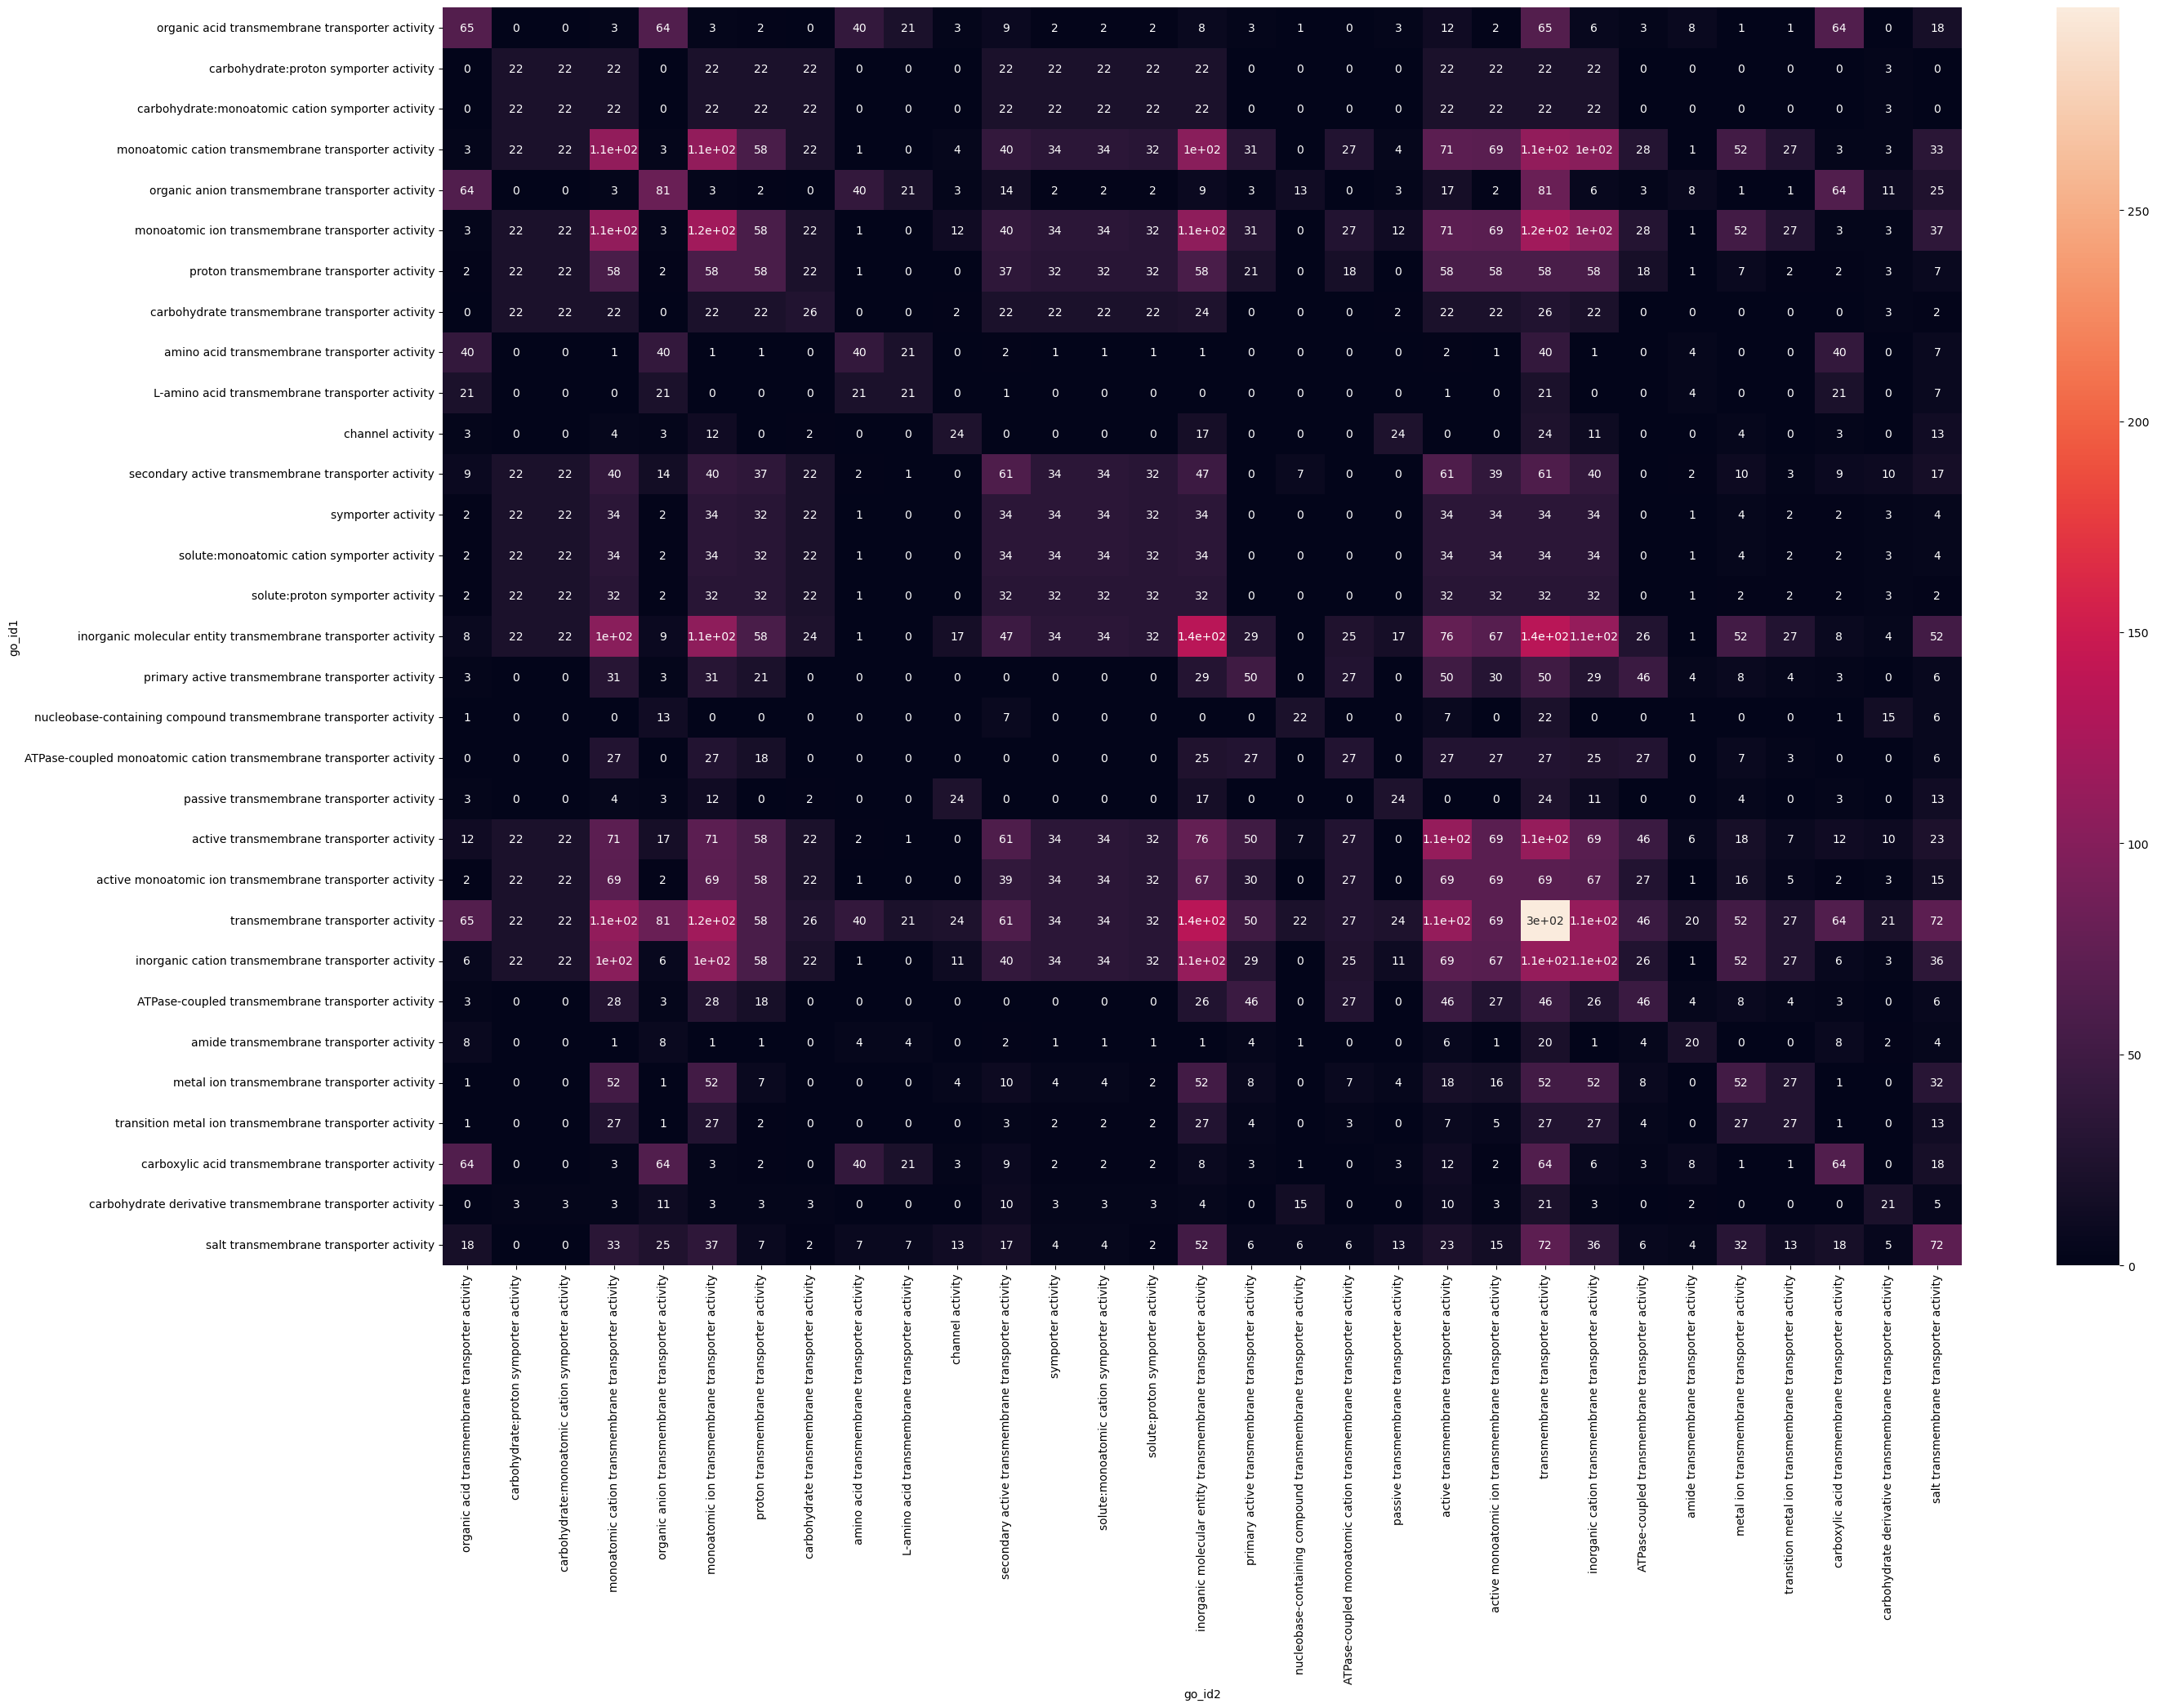

In [38]:
fig, ax = plt.subplots(figsize=(30, 20))
go_id_to_term = {
    go_id: go_term
    for go_id, go_term in df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]]
    .drop_duplicates()
    .to_records(index=False)
}
df_go_overlaps_ge20 = df_go_overlaps.loc[
    np.diag(df_go_overlaps) >= 20, np.diag(df_go_overlaps) >= 20
]

df_go_overlaps_ge20 = df_go_overlaps_ge20.rename(
    columns=go_id_to_term, index=go_id_to_term
)
sns.heatmap(df_go_overlaps_ge20, ax=ax, annot=True)

### ChEBI

In [39]:
exlcude_iea = True
primary_input_only = True
df_go_chebi_overlaps = df_go_chebi.copy(deep=True)
df_uniprot_goa_chebi_overlap = df_uniprot_goa.copy(deep=True)
# df_go_chebi_overlaps["proteins"] = df_go_chebi_overlaps.go_id.map(go_to_proteins)

if primary_input_only:
    df_go_chebi_overlaps = df_go_chebi_overlaps[
        df_go_chebi_overlaps.chebi_go_relation == "has_primary_input"
    ]

df_uniprot_go_chebi = (
    pd.merge(
        df_uniprot_goa_chebi_overlap[["Uniprot", "go_id_ancestor"]].rename(
            columns={"go_id_ancestor": "go_id"}
        ),
        df_go_chebi_overlaps[["go_id", "chebi_id"]],
        on="go_id",
        how="inner",
    )
    .drop_duplicates()
    .reset_index(drop=True)
)
dict_chebi_to_uniprot = (
    df_uniprot_go_chebi[["Uniprot", "chebi_id"]]
    .drop_duplicates()
    .groupby("chebi_id")
    .apply(lambda x: set(x.Uniprot))
    .to_dict()
)
chebi_terms = sorted(dict_chebi_to_uniprot.keys())
df_chebi_overlaps = pd.DataFrame(
    data=[
        [
            len(dict_chebi_to_uniprot[chebi1] & dict_chebi_to_uniprot[chebi2])
            for chebi1 in chebi_terms
        ]
        for chebi2 in chebi_terms
    ],
    columns=chebi_terms,
    index=chebi_terms,
)
df_chebi_overlaps

CHEBI:13389  CHEBI:15354  CHEBI:15361  CHEBI:15377  CHEBI:15595  \
CHEBI:13389            2            0            1            0            0   
CHEBI:15354            0            1            0            0            0   
CHEBI:15361            1            0            4            0            0   
CHEBI:15377            0            0            0            4            0   
CHEBI:15595            0            0            0            0            1   
...                  ...          ...          ...          ...          ...   
CHEBI:63299            0            0            0            0            0   
CHEBI:64709            1            0            4            0            1   
CHEBI:68452            0            0            0            0            0   
CHEBI:77847            0            0            0            0            0   
CHEBI:83821            0            1            0            0            0   

             CHEBI:15676  CHEBI:15792  CHEBI:15927  CHEBI:16189  CHEBI:16199  \
CHEBI:13389            0            0            0            0            0   
CHEBI:15354            0            0            0            0            0   
CHEBI:15361            0            0            0            0            0   
CHEBI:15377            0            0            0            0            0   
CHEBI:15595            0            0            0            1            0   
...                  ...          ...          ...          ...          ...   
CHEBI:63299            0            0            2            0            0   
CHEBI:64709            0            1            0            2            0   
CHEBI:68452            0            0            1            0            0   
CHEBI:77847            0            0            0            0            0   
CHEBI:83821            0            0            0            0            0   

             ...  CHEBI:61109  CHEBI:61292  CHEBI:61293  CHEBI:61336  \
CHEBI:13389  ...            0            0            2            0   
CHEBI:15354  ...            0            0            0            0   
CHEBI:15361  ...            0            0            1            0   
CHEBI:15377  ...            0            0            0            0   
CHEBI:15595  ...            0            0            0            1   
...          ...          ...          ...          ...          ...   
CHEBI:63299  ...            2            0           10            2   
CHEBI:64709  ...            0            0            3            6   
CHEBI:68452  ...            0            0            0            1   
CHEBI:77847  ...            0            0            0            0   
CHEBI:83821  ...            0            0            0            1   

             CHEBI:63063  CHEBI:63299  CHEBI:64709  CHEBI:68452  CHEBI:77847  \
CHEBI:13389            0            0            1            0            0   
CHEBI:15354            0            0            0            0            0   
CHEBI:15361            0            0            4            0            0   
CHEBI:15377            0            0            0            0            0   
CHEBI:15595            0            0            1            0            0   
...                  ...          ...          ...          ...          ...   
CHEBI:63299            0           25            3            2            1   
CHEBI:64709            2            3           65            3            0   
CHEBI:68452            0            2            3            8            0   
CHEBI:77847            0            1            0            0            1   
CHEBI:83821            0            0            5            2            0   

             CHEBI:83821  
CHEBI:13389            0  
CHEBI:15354            1  
CHEBI:15361            0  
CHEBI:15377            0  
CHEBI:15595            0  
...                  ...  
CHEBI:63299            0  
CHEBI:64709            5  
CHEBI:68452           

<Axes: xlabel='go_id2', ylabel='go_id1'>

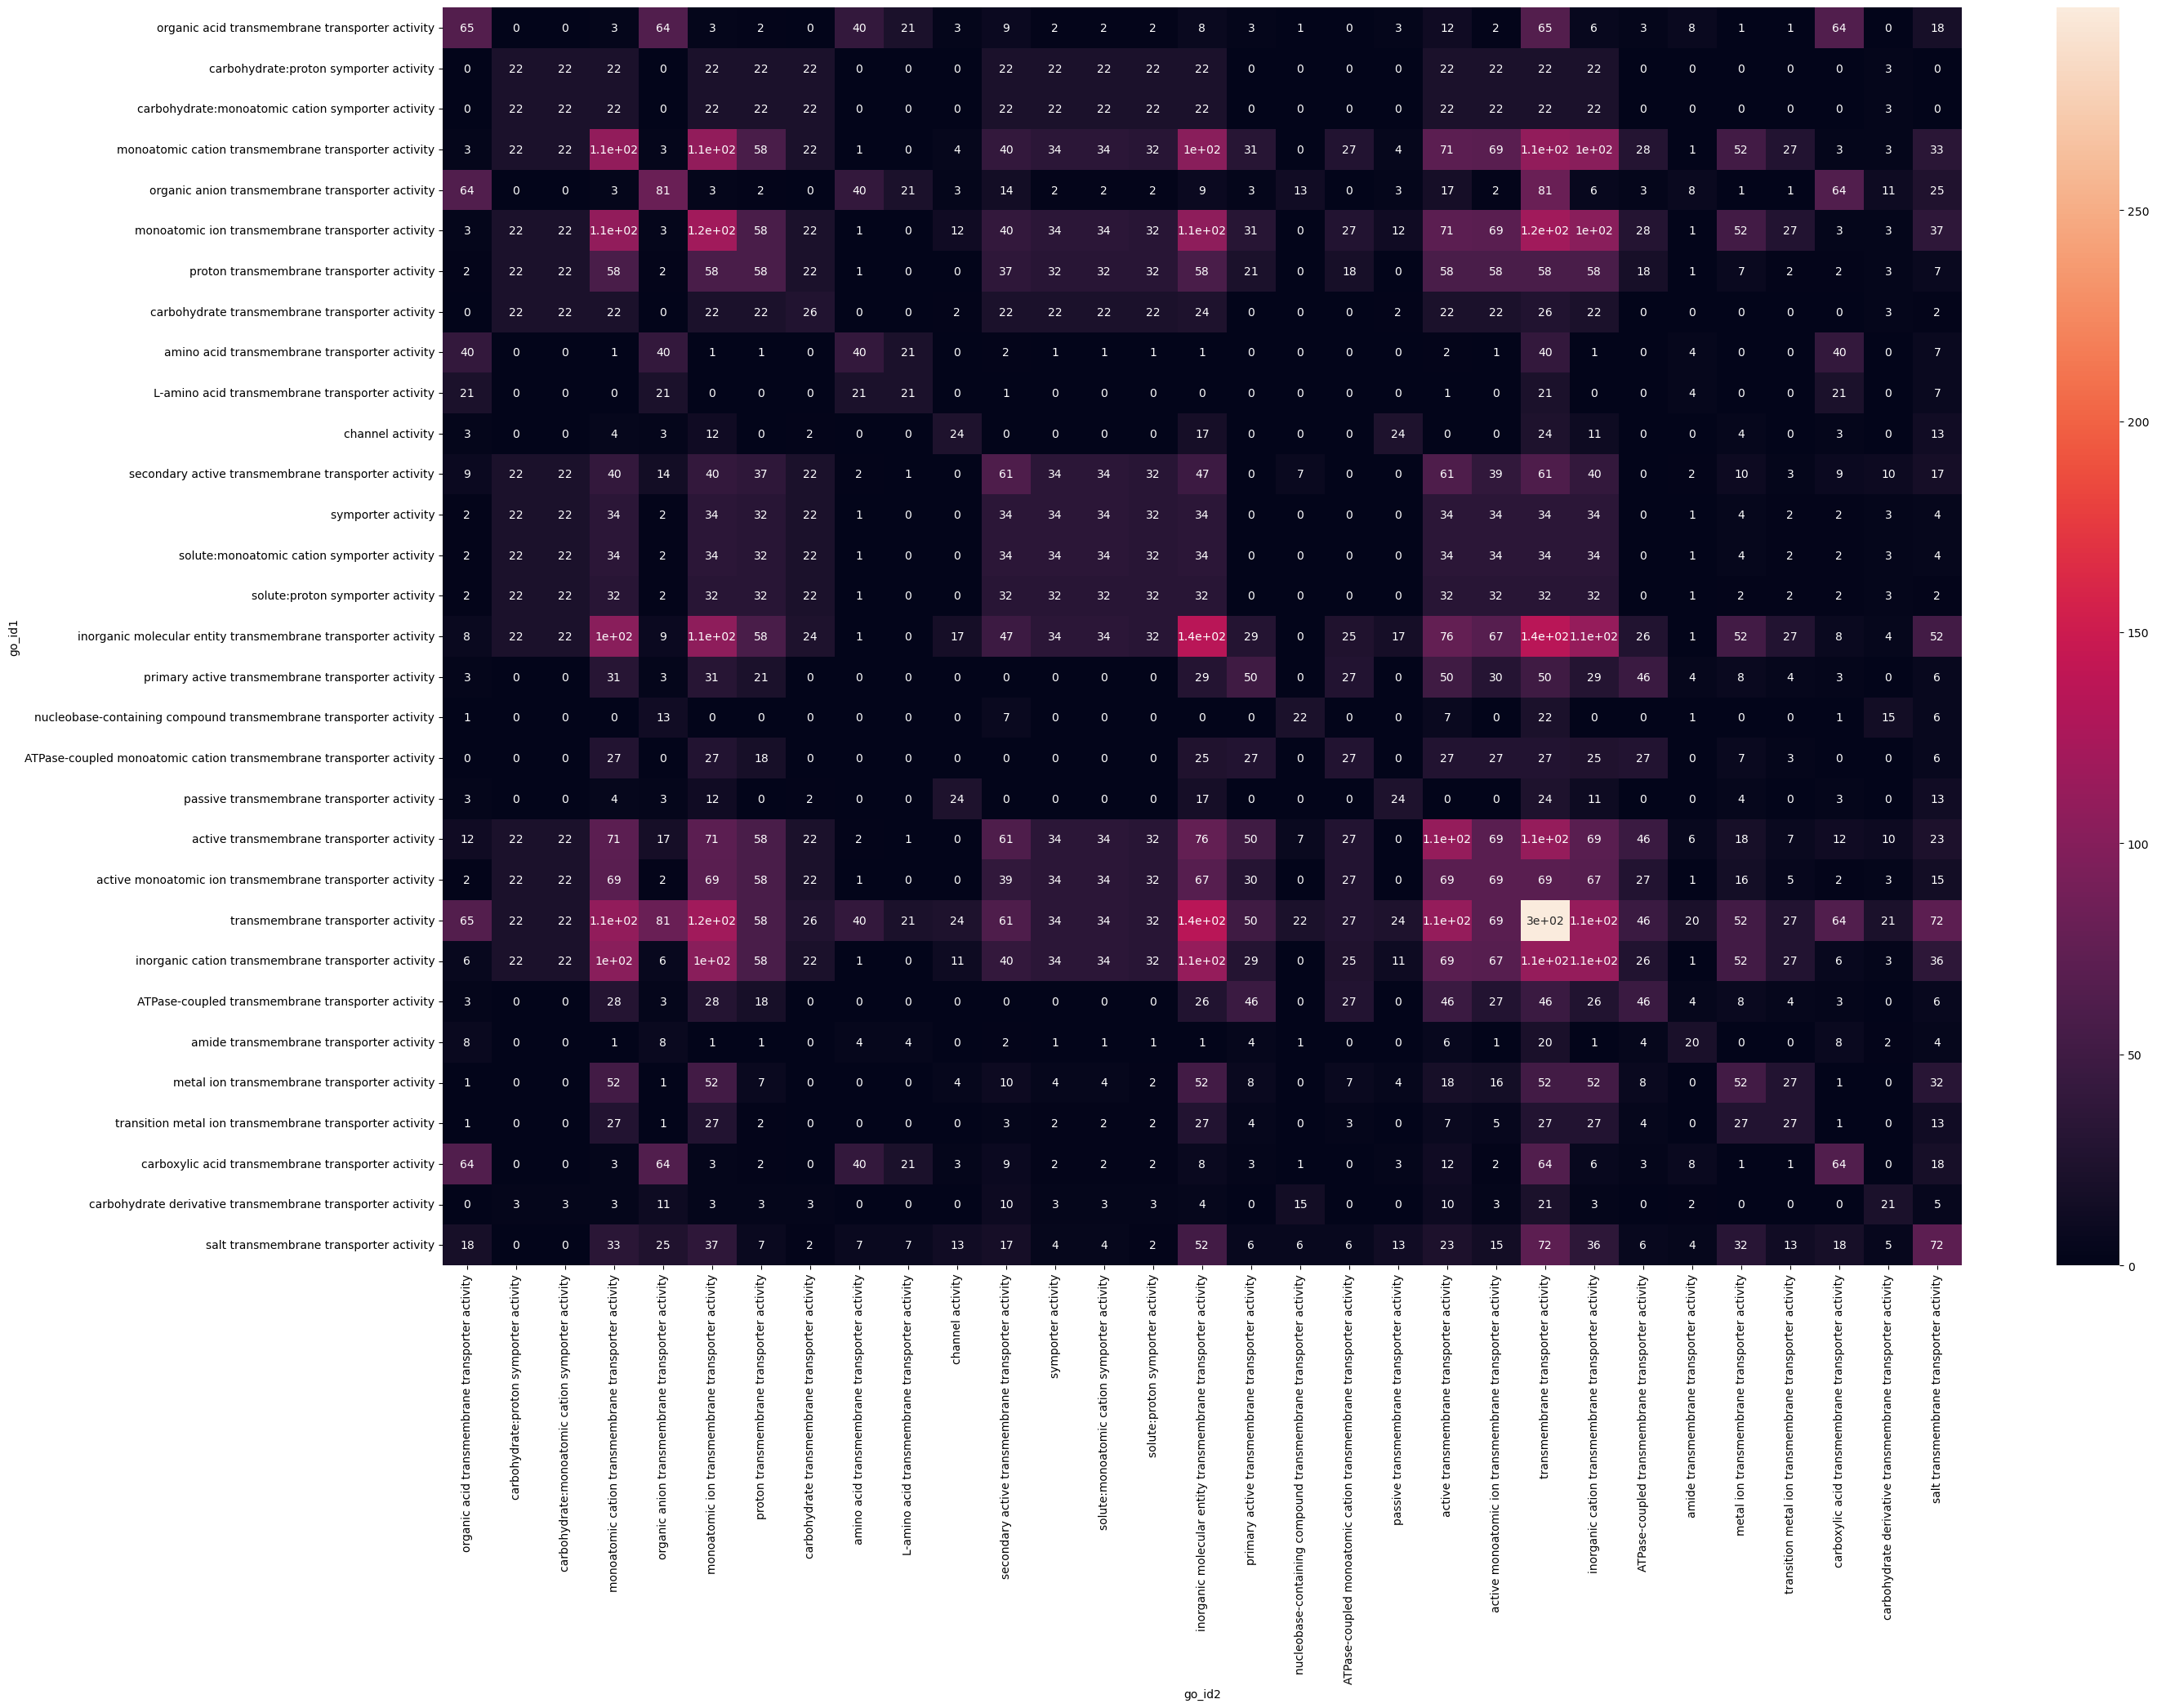

In [40]:
fig, ax = plt.subplots(figsize=(30, 20))
go_id_to_term = {
    go_id: go_term
    for go_id, go_term in df_uniprot_goa[["go_id_ancestor", "go_term_ancestor"]]
    .drop_duplicates()
    .to_records(index=False)
}
df_go_overlaps_ge20 = df_go_overlaps.loc[
    np.diag(df_go_overlaps) >= 20, np.diag(df_go_overlaps) >= 20
]

df_go_overlaps_ge20 = df_go_overlaps_ge20.rename(
    columns=go_id_to_term, index=go_id_to_term
)
sns.heatmap(df_go_overlaps_ge20, ax=ax, annot=True)

<Axes: >

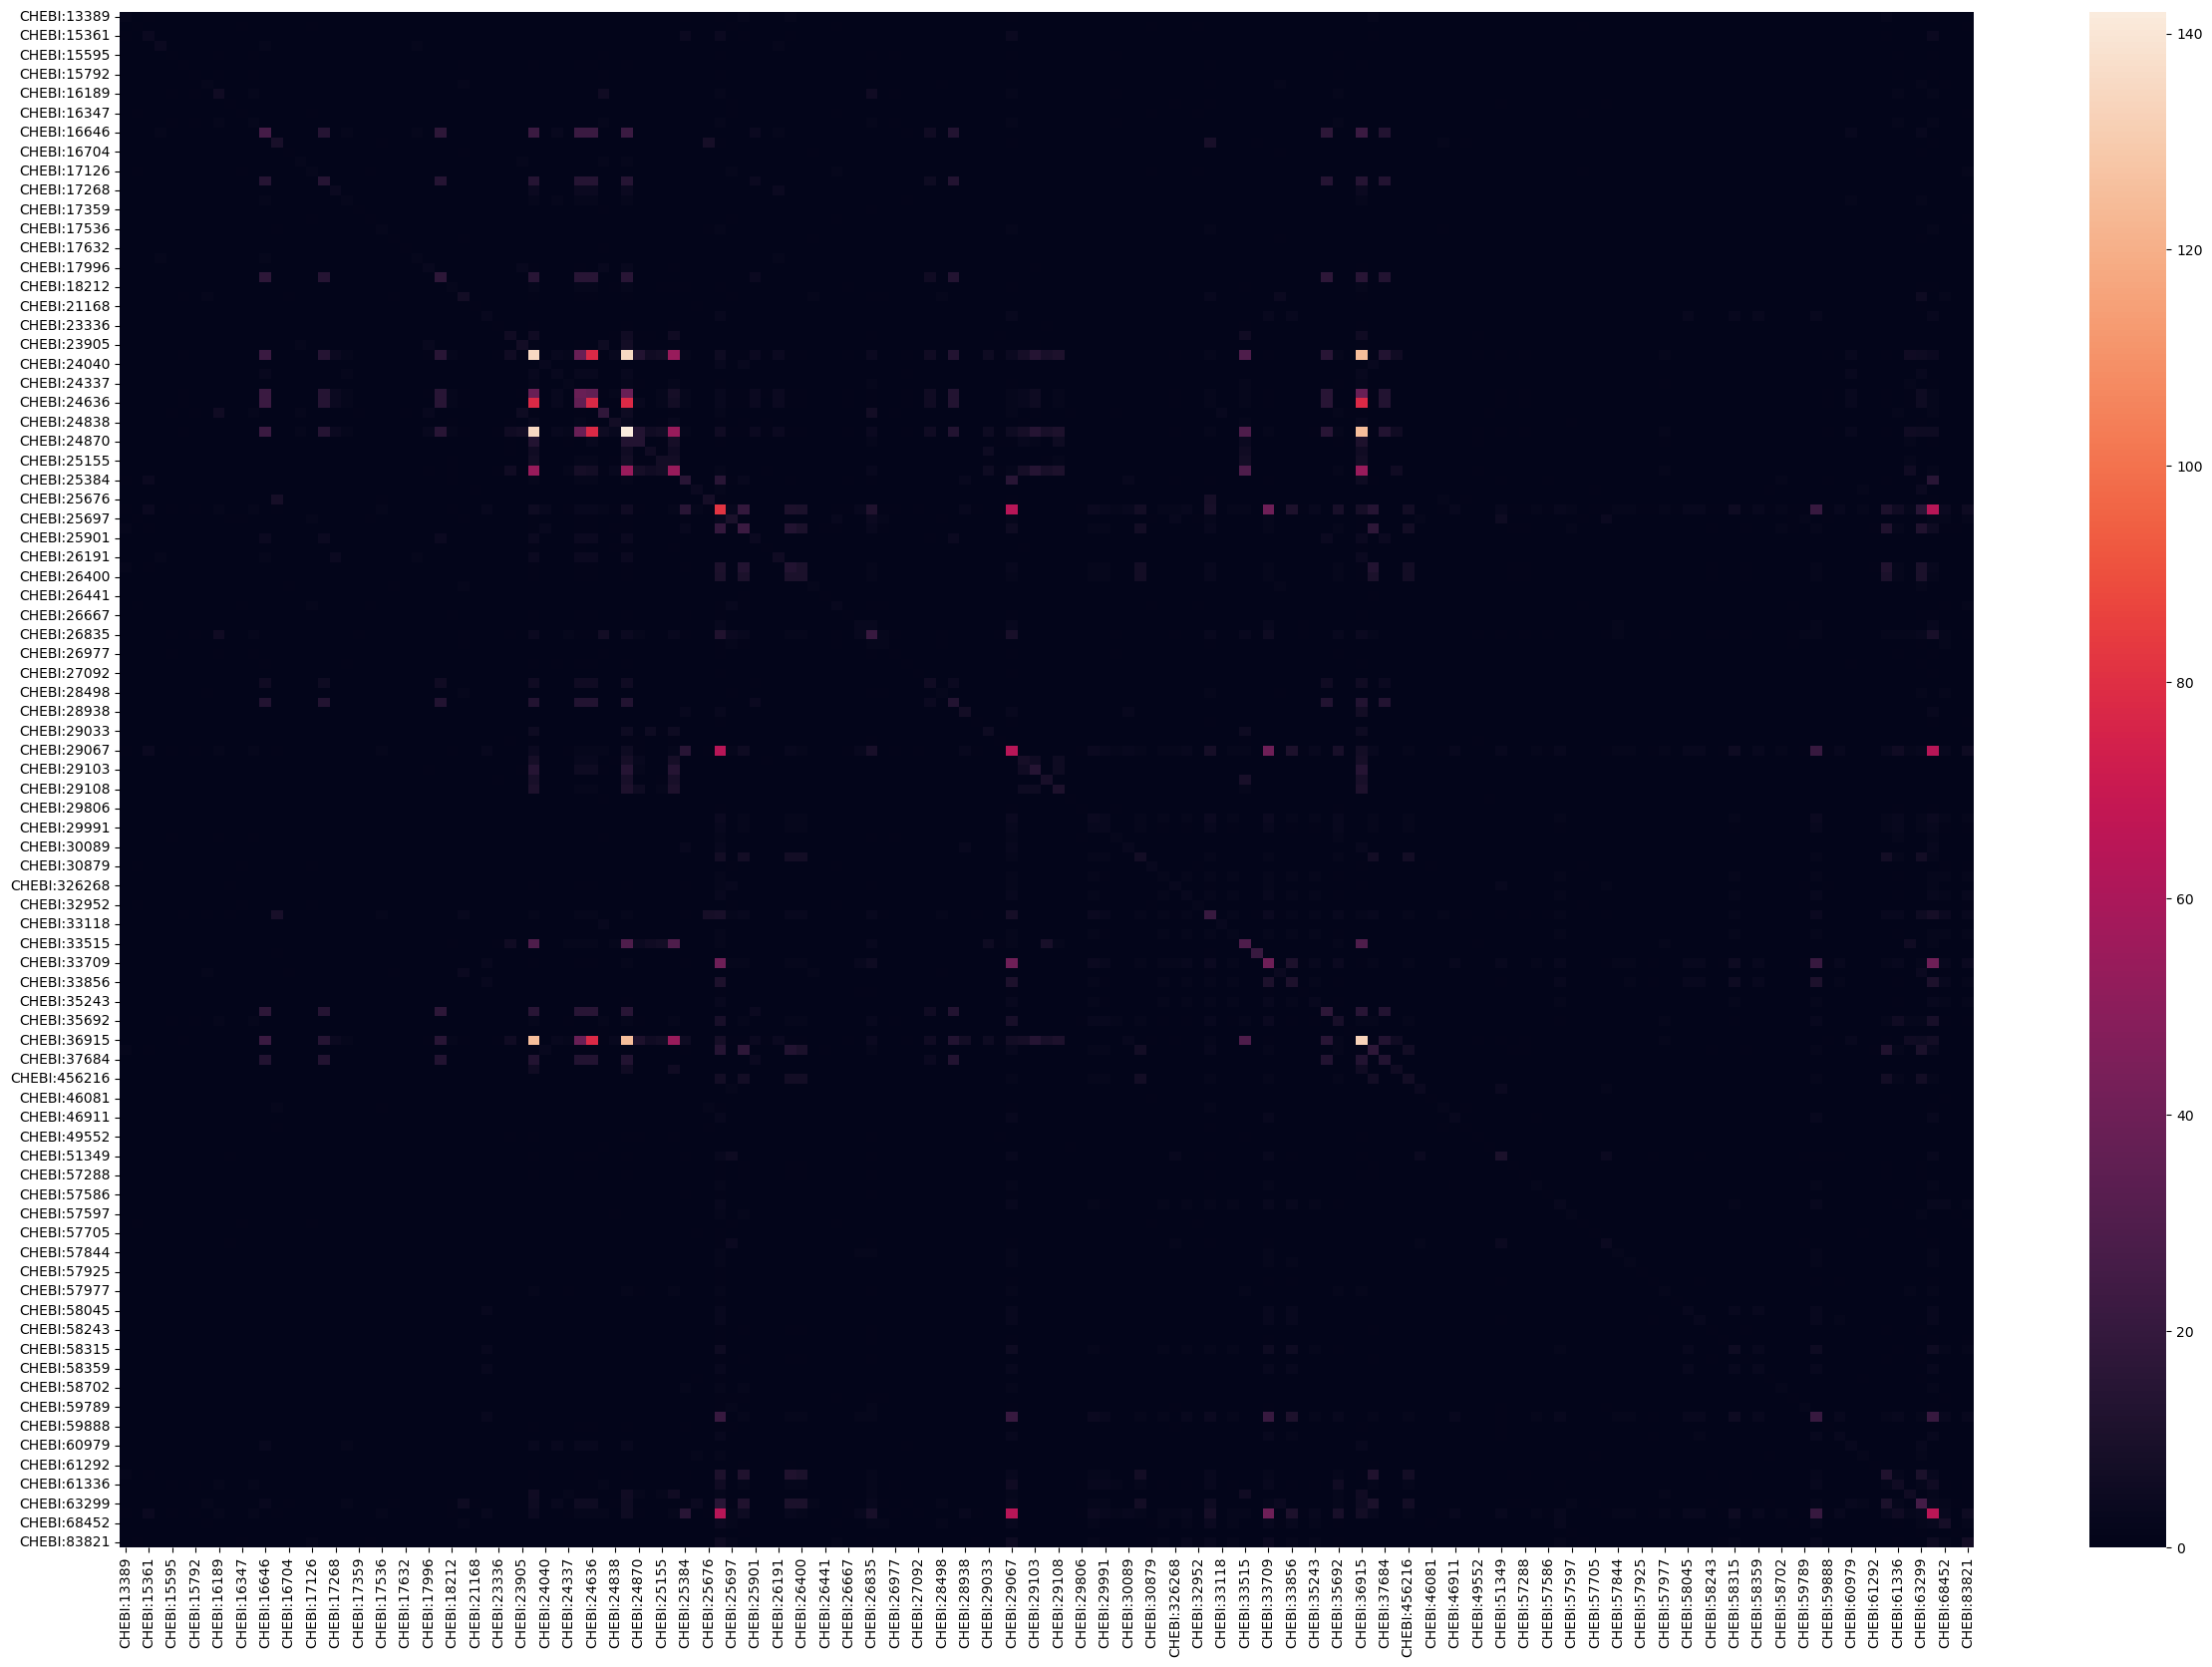

In [41]:
fig, ax = plt.subplots(figsize=(30, 20))
df_chebi_overlaps_ge20 = df_chebi_overlaps.loc[
    np.diag(df_chebi_overlaps) >= 20, np.diag(df_chebi_overlaps) >= 20
]
sns.heatmap(df_chebi_overlaps, ax=ax)

## GO Semantic Similarity

- GOGO
    - Perl/C
    - Not updated
    - https://github.com/zwang-bioinformatics/GOGO
    - https://www.nature.com/articles/s41598-018-33219-y
- G-SESAME
    - Webserver, closed source
    - Not updated
    - https://doi.org/10.1093/bioinformatics/btm087
- GOntoSim
    - Python 2.7
    - Not updated
    - https://www.nature.com/articles/s41598-022-07624-3
    - https://github.com/cbrl-nuces/GOntoSim
- GOssTo
    - Java
    - Not updated
    - https://github.com/pwac092/gossto
- GOSemSim
    - R
    - Includes other methods
    - https://bioconductor.org/packages/release/bioc/html/GOSemSim.html
- goatools?
- Review: https://link.springer.com/protocol/10.1007/978-1-4939-3743-1_12
- Related/Not related binary matrix including all descendants
- Shortest paths
- binary fingerprint of children
- topological sorting?

In [42]:
# https://rpy2.github.io/doc/latest/html/introduction.html
# https://berkeley-scf.github.io/tutorial-parallelization/parallel-R.html

from rpy2.robjects import r, StrVector
from subpred.util import load_df
from tempfile import NamedTemporaryFile
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri


def get_go_annotation_df(
    qualifiers: set = {"enables"},
    evidence_codes_exclude: set = {"IEA"},
    aspects: set = {"F"},
):
    """
        The GoSemSim package expects data from AnnotationDBI.
        However, this means that we can only calculate similarities between GO terms from the same organism, not on the entire GO.
        We fix this by creating this object directly, from our go annotation pickle, analogous to the godata function in GoSemSim_summary_

    Args:
        qualifiers (set, optional): Allowed relations between proteins and go terms. Defaults to {"enables"}.
        evidence_codes_exclude (set, optional): See go documentation. Defaults to {"IEA"}.
        aspects (set, optional): Options: C, F, P. Defaults to {"F"}.

    Returns:
        pd.DataFrame: Annotation dataframe compatible with get_go_semantic_similarities
    """
    df_goa = load_df("go")
    df_goa = df_goa[
        (df_goa.qualifier.isin(qualifiers))
        & (~df_goa.evidence_code.isin(evidence_codes_exclude))
        & (df_goa.aspect.isin(aspects))
    ].reset_index(drop=True)
    aspect_to_orgdb_aspect = {"F": "MF", "C": "CC", "P": "BP"}
    df_goa["aspect"] = df_goa.aspect.map(aspect_to_orgdb_aspect)
    df_goa = df_goa.drop("qualifier", axis=1).rename(
        columns={
            "Uniprot": "UNIPROT",
            "go_id": "GO",
            "evidence_code": "EVIDENCE",
            "aspect": "ONTOLOGY",
        }
    )
    return df_goa


def get_go_semantic_similarities(
    df_goa: pd.DataFrame,
    go_id_subset: np.array,
    method="Wang",
    parallelization_method: str = "multicore",
    conversion_method: str = "internal",
):
    """Wrapper for the GOSemSim R package, with support for efficient parallel processing

    Args:
        df_goa (pd.DataFrame): Dataframe created with the get_annotation_data method
        go_id_subset (np.array): go ids for which to calculate pairwise similarities
        method (str, optional):
            Algorithm for calculation similarity.
            Options: "Resnik", "Lin", "Rel", "Jiang", "TCSS" and "Wang"
            Defaults to "Wang".
        parallelization_method (str, optional):
            If "multisession", clones the R session for every thread.
                Slower start and much higher memory consumption.
            If "multicore", forks R process and allows parallel access to the dataframes.
                Global vars *are* copied if they are modified by worker, but we only read them anyways.
                Much faster and lower memory consumption, not available on Windows.
            Defaults to "multicore".
        conversion_method (str, optional):
            If "temp_file", write results to tmp file in R and then read that file with pandas, deleting the file afterwards.
            If "internal", uses internal conversion methods between rpy2 and pandas.
            Which method is faster depends on the machine and the dataset size.
            Defaults to "internal".
    Raises:
        ValueError: Parameter not recognized

    Returns:
        _type_: _description_
    """
    tmp_file = NamedTemporaryFile(suffix=".tsv")
    df_goa.to_csv(tmp_file, sep="\t")
    df_goa_path = tmp_file.name

    r(
        f"""
        library(GOSemSim)
        library(future.apply)
        goa <- read.table('{df_goa_path}')
        kk <- unique(goa$UNIPROT)
        d <- new("GOSemSimDATA", keys = kk, ont = "MF", geneAnno = goa)
            """
    )

    r(
        """
        similarities <- function(go1, go2){
            goSim(go1, go2, semData=d, measure="Wang")
        }
        similarities_vec <- function(go_term, go_vec, measure){
            similarities_list <- lapply(go_vec, goSim, GOID2=go_term, semData=d, measure=measure)
            return(unlist(similarities_list))
        }
        set_plan <- function(plan_str){
            if (plan_str == "multicore"){
                plan(multicore)  # Much faster and lower memory consumtion
            } else {
                plan(multisession)  # Clone R session for each worker
            }
        }
        similarities_par <- function(go_vec, method){
            results <- future_lapply(go_vec, similarities_vec, go_vec=go_vec, measure=method)
            results <- as.data.frame(results, row.names = go_vec, col.names = go_vec)
            return(results)
        }
        write_tmp <- function(df, file_name){
            # print()
            write.table(df, file_name, sep='\t', quote=FALSE, col.names=TRUE, row.names=TRUE)
        }
    """
    )

    tmp_file.close()

    set_plan = r["set_plan"]
    set_plan(parallelization_method)

    goSimVec = r["similarities_par"]
    vector = np.unique(go_id_subset) if go_id_subset is not None else df_goa.GO.unique()
    vector_r = StrVector(vector)
    results_r = goSimVec(vector_r, method)

    if conversion_method == "internal":
        # df_go_similarity = ro.conversion.rpy2py(results_r)
        with (ro.default_converter + pandas2ri.converter).context():
            df_go_similarity = ro.conversion.get_conversion().rpy2py(results_r)
    elif conversion_method == "temp_file":
        # write tmp file then read it with pandas. converting the R object to python took longer than the calculations
        write_table = r["write_tmp"]
        tmp_file = NamedTemporaryFile()
        write_table(results_r, tmp_file.name)
        df_go_similarity = pd.read_table(tmp_file)
        tmp_file.close()
    else:
        raise ValueError("Invalid dataframe conversion method.")

    df_go_similarity.columns = df_go_similarity.columns.to_series().str.replace(
        ".", ":"
    )
    return df_go_similarity

In [43]:
df_goa_mf_noiea = get_go_annotation_df(
    qualifiers={"enables"},
    evidence_codes_exclude={"IEA"},
    aspects={"F"},
)

In [44]:
df_semantic_similarity_wang = get_go_semantic_similarities(
    df_goa=df_goa_mf_noiea,
    go_id_subset=df_uniprot_goa.go_id_ancestor.unique(),
    method="Wang",
    parallelization_method="multicore",
    conversion_method="internal",
)
df_semantic_similarity_wang

R[write to console]: 

R[write to console]: GOSemSim v2.26.0  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use GOSemSim in published research, please cite:
- Guangchuang Yu. Gene Ontology Semantic Similarity Analysis Using GOSemSim. In: Kidder B. (eds) Stem Cell Transcriptional Networks. Methods in Molecular Biology, 2020, 2117:207-215. Humana, New York, NY. doi:10.1007/978-1-0716-0301-7_11
- Guangchuang Yu, Fei Li, Yide Qin, Xiaochen Bo, Yibo Wu, Shengqi Wang. GOSemSim: an R package for measuring semantic similarity among GO terms and gene products Bioinformatics 2010, 26(7):976-978. doi:10.1093/bioinformatics/btq064



R[write to console]: Loading required package: future



GO:0000006  GO:0000007  GO:0000064  GO:0000095  GO:0000099  \
GO:0000006       1.000       0.713       0.300       0.330       0.233   
GO:0000007       0.713       1.000       0.300       0.330       0.233   
GO:0000064       0.300       0.300       1.000       0.471       0.565   
GO:0000095       0.330       0.330       0.471       1.000       0.520   
GO:0000099       0.233       0.233       0.565       0.520       1.000   
...                ...         ...         ...         ...         ...   
GO:1901702       0.349       0.349       0.518       0.548       0.364   
GO:1902557       0.191       0.191       0.394       0.439       0.408   
GO:1903089       0.211       0.211       0.326       0.350       0.310   
GO:1903425       0.293       0.293       0.408       0.475       0.430   
GO:1904680       0.260       0.260       0.395       0.431       0.387   

            GO:0000100  GO:0000102  GO:0000295  GO:0000297  GO:0000319  ...  \
GO:0000006       0.267       0.166       0.114       0.326       0.267  ...   
GO:0000007       0.267       0.166       0.114       0.326       0.267  ...   
GO:0000064       0.381       0.538       0.247       0.473       0.381  ...   
GO:0000095       0.588       0.366       0.265       0.495       0.588  ...   
GO:0000099       0.548       0.543       0.217       0.321       0.548  ...   
...                ...         ...         ...         ...         ...  ...   
GO:1901702       0.434       0.311       0.363       0.653       0.434  ...   
GO:1902557       0.457       0.320       0.636       0.281       0.457  ...   
GO:1903089       0.368       0.208       0.301       0.398       0.368  ...   
GO:1903425       0.503       0.258       0.308       0.419       0.673  ...   
GO:1904680       0.456       0.250       0.390       0.493       0.456  ...   

            GO:1901474  GO:1901505  GO:1901618  GO:1901680  GO:1901682  \
GO:0000006       0.252       0.252       0.377       0.205       0.351   
GO:0000007       0.252       0.252       0.377       0.205       0.351   
GO:0000064       0.404       0.404       0.488       0.450       0.310   
GO:0000095       0.446       0.446       0.564       0.423       0.609   
GO:0000099       0.396       0.396       0.521       0.755       0.616   
...                ...         ...         ...         ...         ...   
GO:1901702       0.590       0.590       0.553       0.318       0.284   
GO:1902557       0.332       0.472       0.433       0.344       0.451   
GO:1903089       0.698       0.698       0.465       0.278       0.276   
GO:1903425       0.525       0.525       0.651       0.358       0.460   
GO:1904680       0.609       0.609       0.571       0.338       0.319   

            GO:1901702  GO:1902557  GO:1903089  GO:1903425  GO:1904680  
GO:0000006       0.349       0.191       0.211       0.293       0.260  
GO:0000007       0.349       0.191       0.211       0.293       0.260  
GO:0000064       0.518       0.394       0.326       0.408       0.395  
GO:0000095       0.548       0.439       0.350       0.475       0.431  
GO:0000099       0.364       0.408       0.310       0.430       0.387  
...                ...         ...         ...         ...         ...  
GO:1901702       1.000       0.311       0.445       0.475       0.553  
GO:1902557       0.311       1.000       0.369       0.362       0.331  
GO:1903089       0.445       0.369       1.000       0.398       0.621  
GO:1903425       0.475       0.362       0.398       1.000       0.497  
GO:1904680       0.553       0.331       0.621       0.497       1.000  

[288 rows x 288 columns]

## Pairwise ML models

- find label combinations with enough samples

In [45]:
from subpred.go_prediction import (
    get_model_evaluation_matrix_parallel,
    process_pairwise_eval_results,
    plot_results_as_heatmap,
)

pairwise_eval_results = get_model_evaluation_matrix_parallel(
    df_sequences,
    df_uniprot_goa,
    exclude_iea=True,
    standardize_samples=True,
    multi_output=True,
    min_samples_per_class=20,
    min_unique_samples_per_class=20,
    model_name="svc_multi",
    n_jobs=-1,
)

df_train, df_test = process_pairwise_eval_results(
    pairwise_eval_results=pairwise_eval_results, df_uniprot_goa=df_uniprot_goa
)
# TODO graph with sample stats: y axis number of models, x axis samples per class, multi vs single
# TODO feature selection/pca on tera improved scores by quite a bit
# TODO with feature combinator
# TODO pca fewer steps

<Axes: title={'center': 'average grid search test scores for each label across CV folds'}, xlabel='neg_label', ylabel='pos_label'>

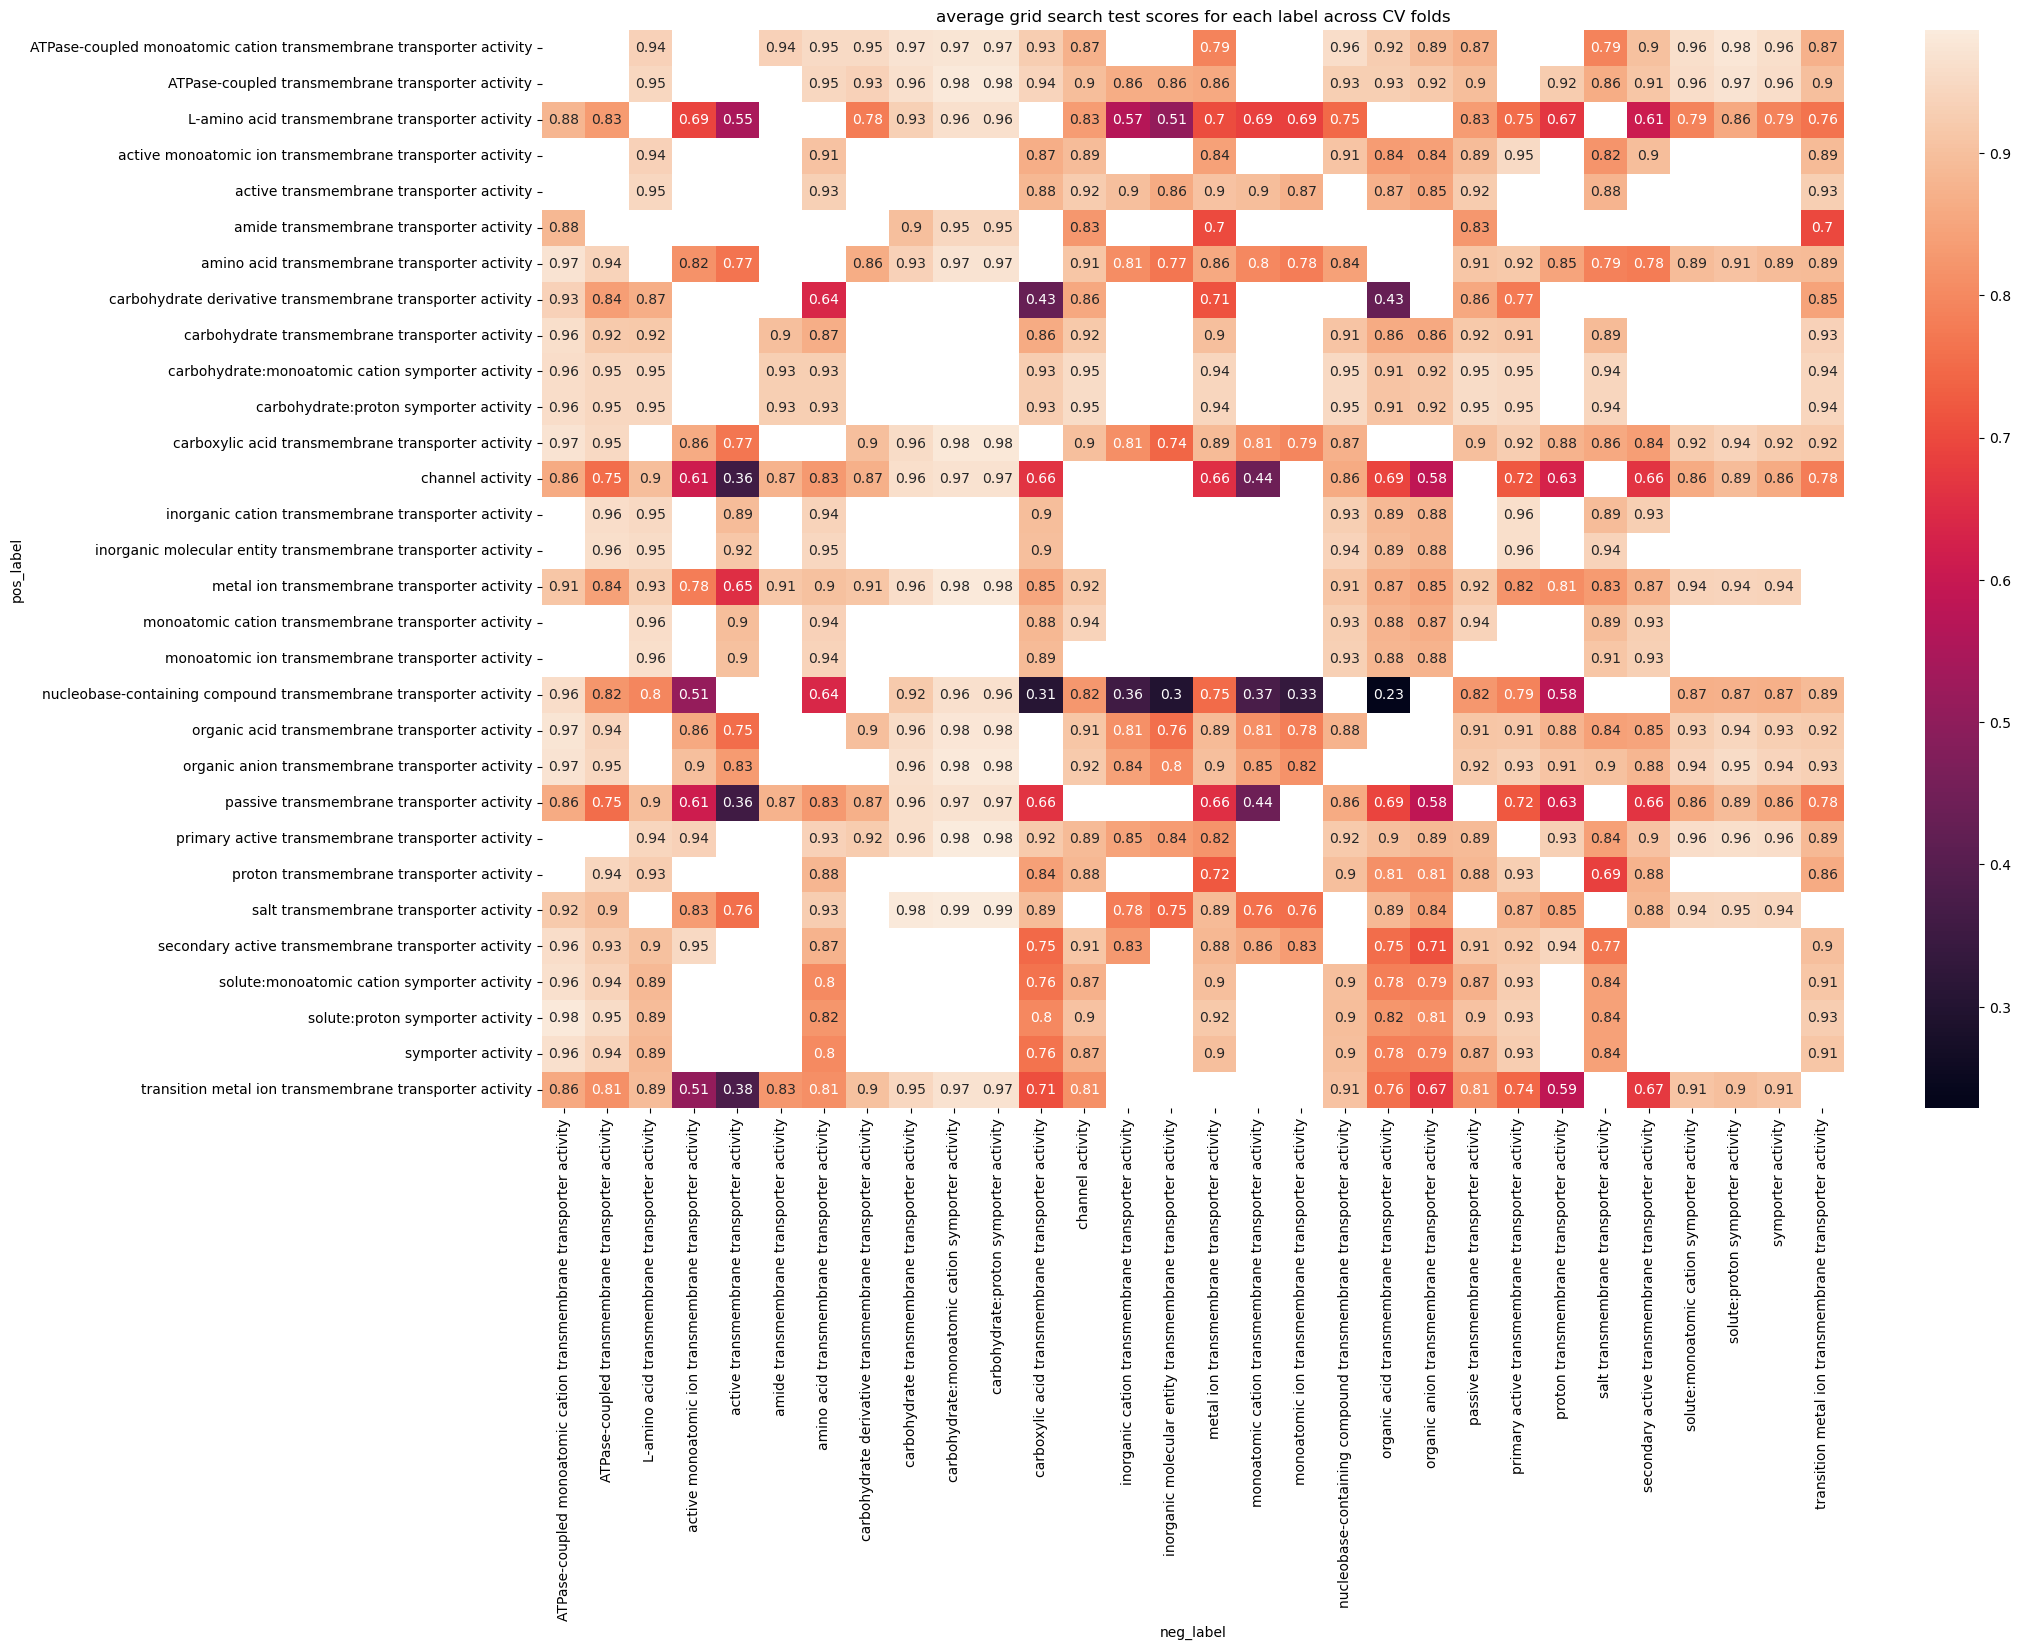

In [46]:
plot_results_as_heatmap(
    df_train, title="average grid search test scores for each label across CV folds"
)

<Axes: title={'center': 'average grid search test scores for each label across CV folds, sorted'}, xlabel='neg_label', ylabel='pos_label'>

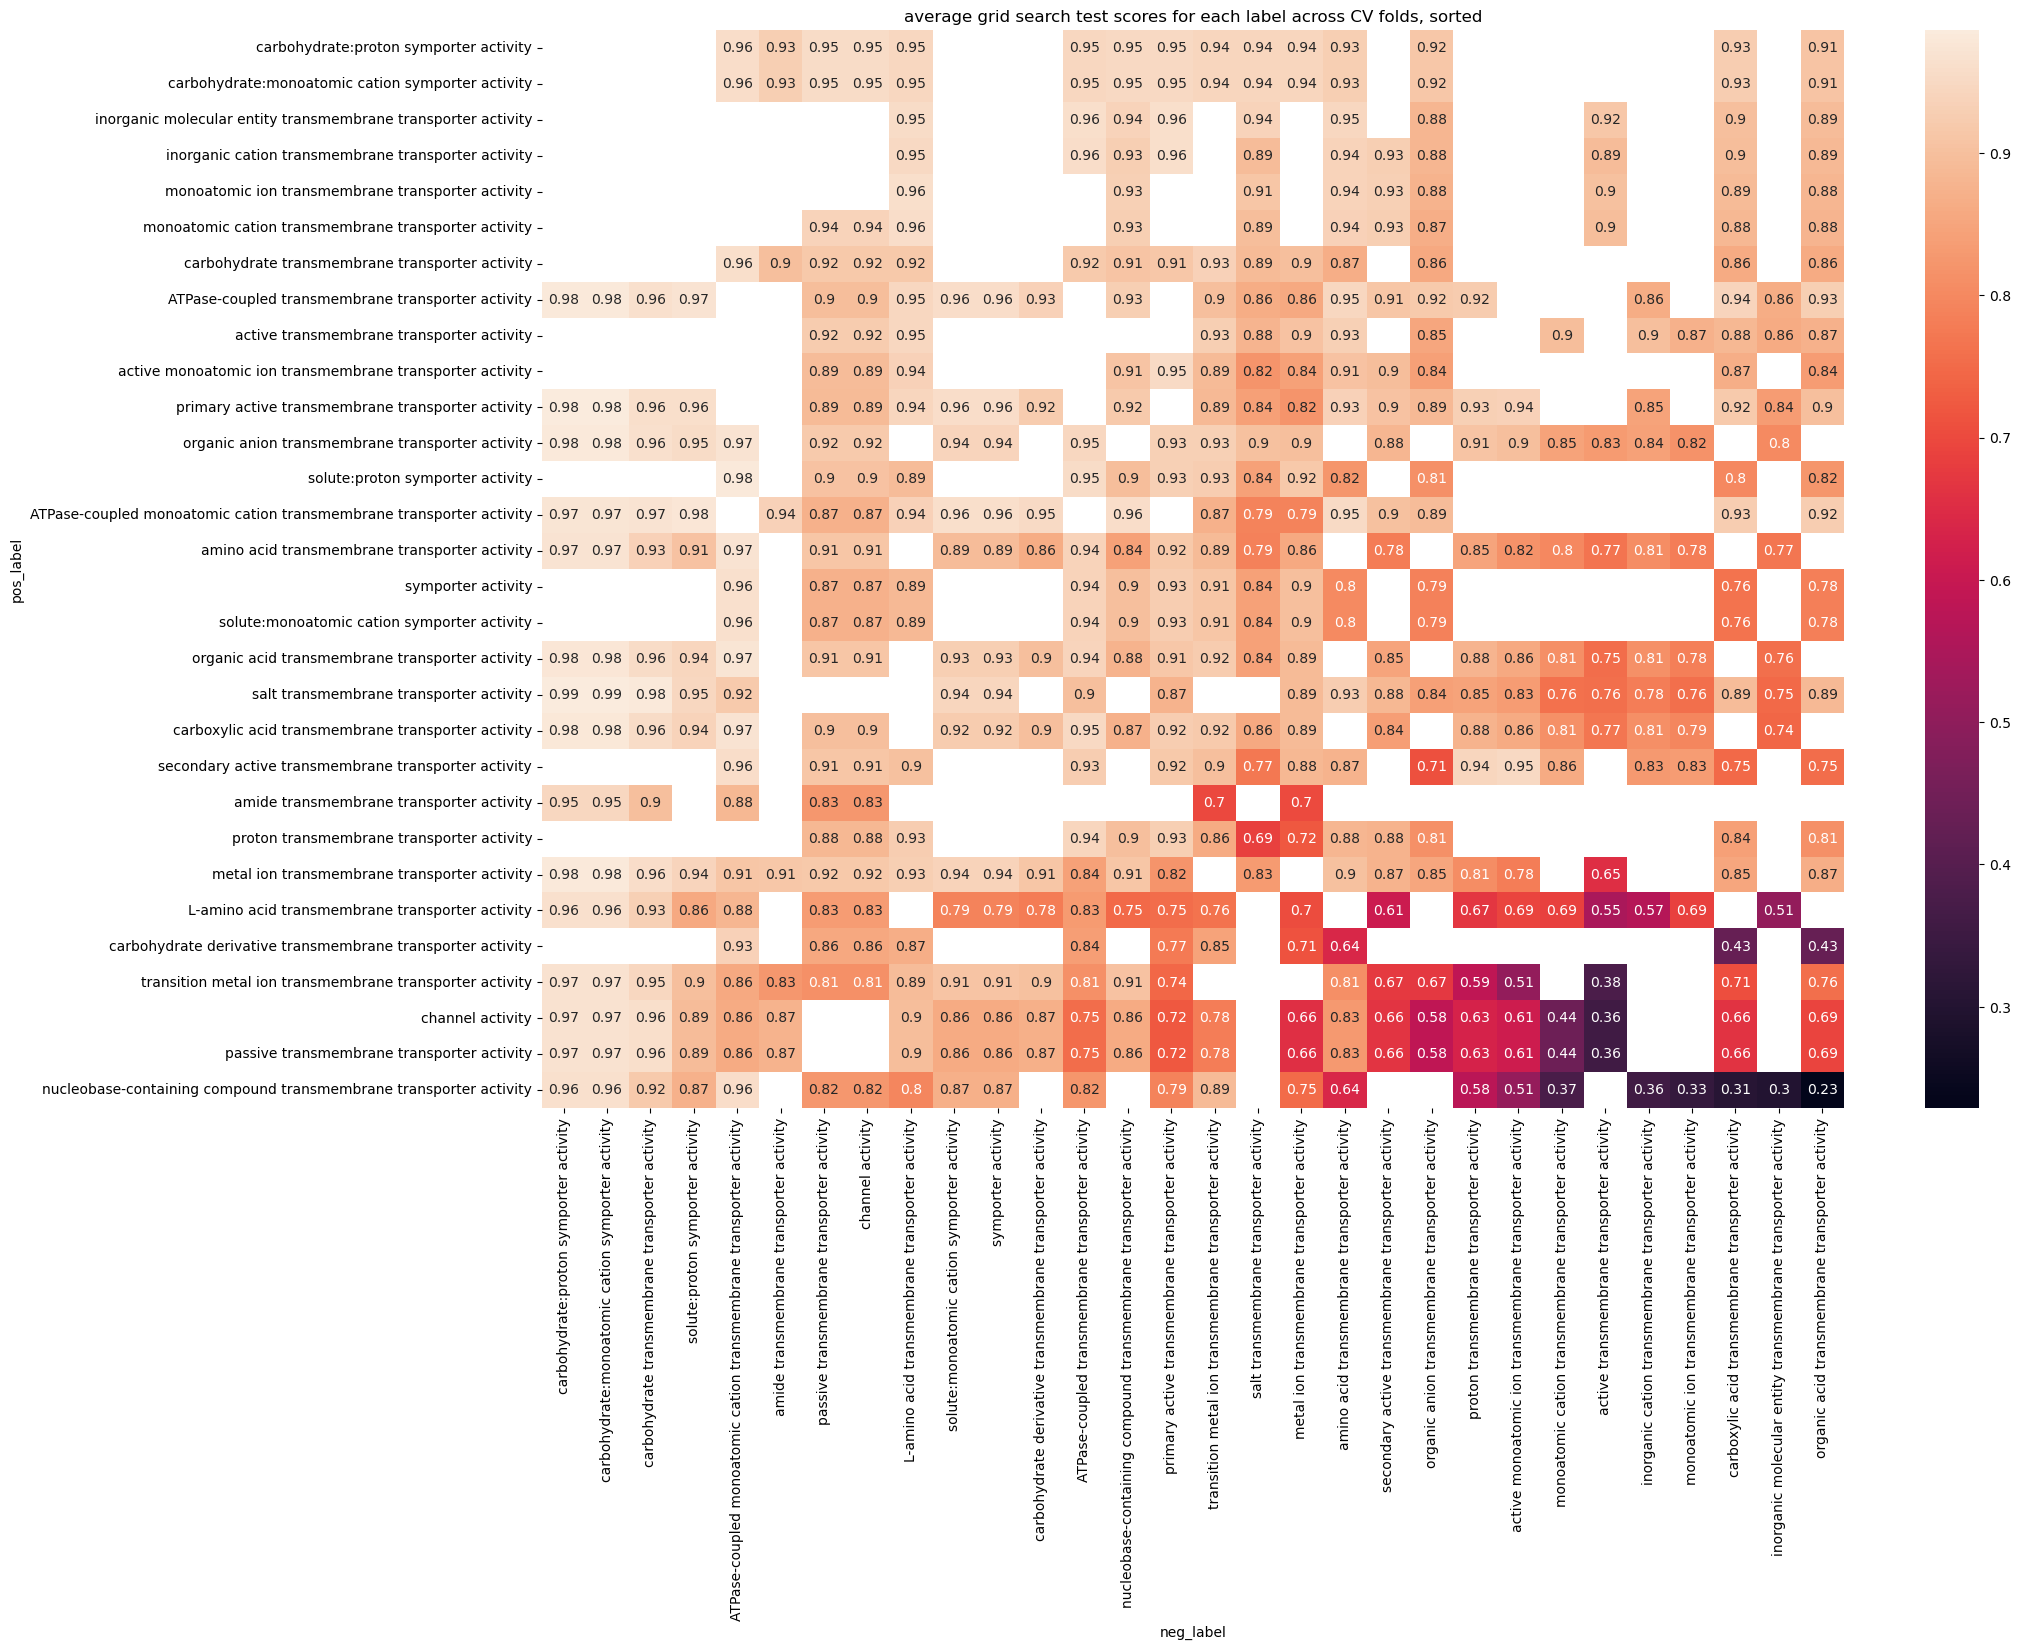

In [47]:
plot_results_as_heatmap(
    df_train,
    title="average grid search test scores for each label across CV folds, sorted",
    sort=True,
)

<Axes: title={'center': 'average independent test set scores for each label across CV folds'}, xlabel='neg_label', ylabel='pos_label'>

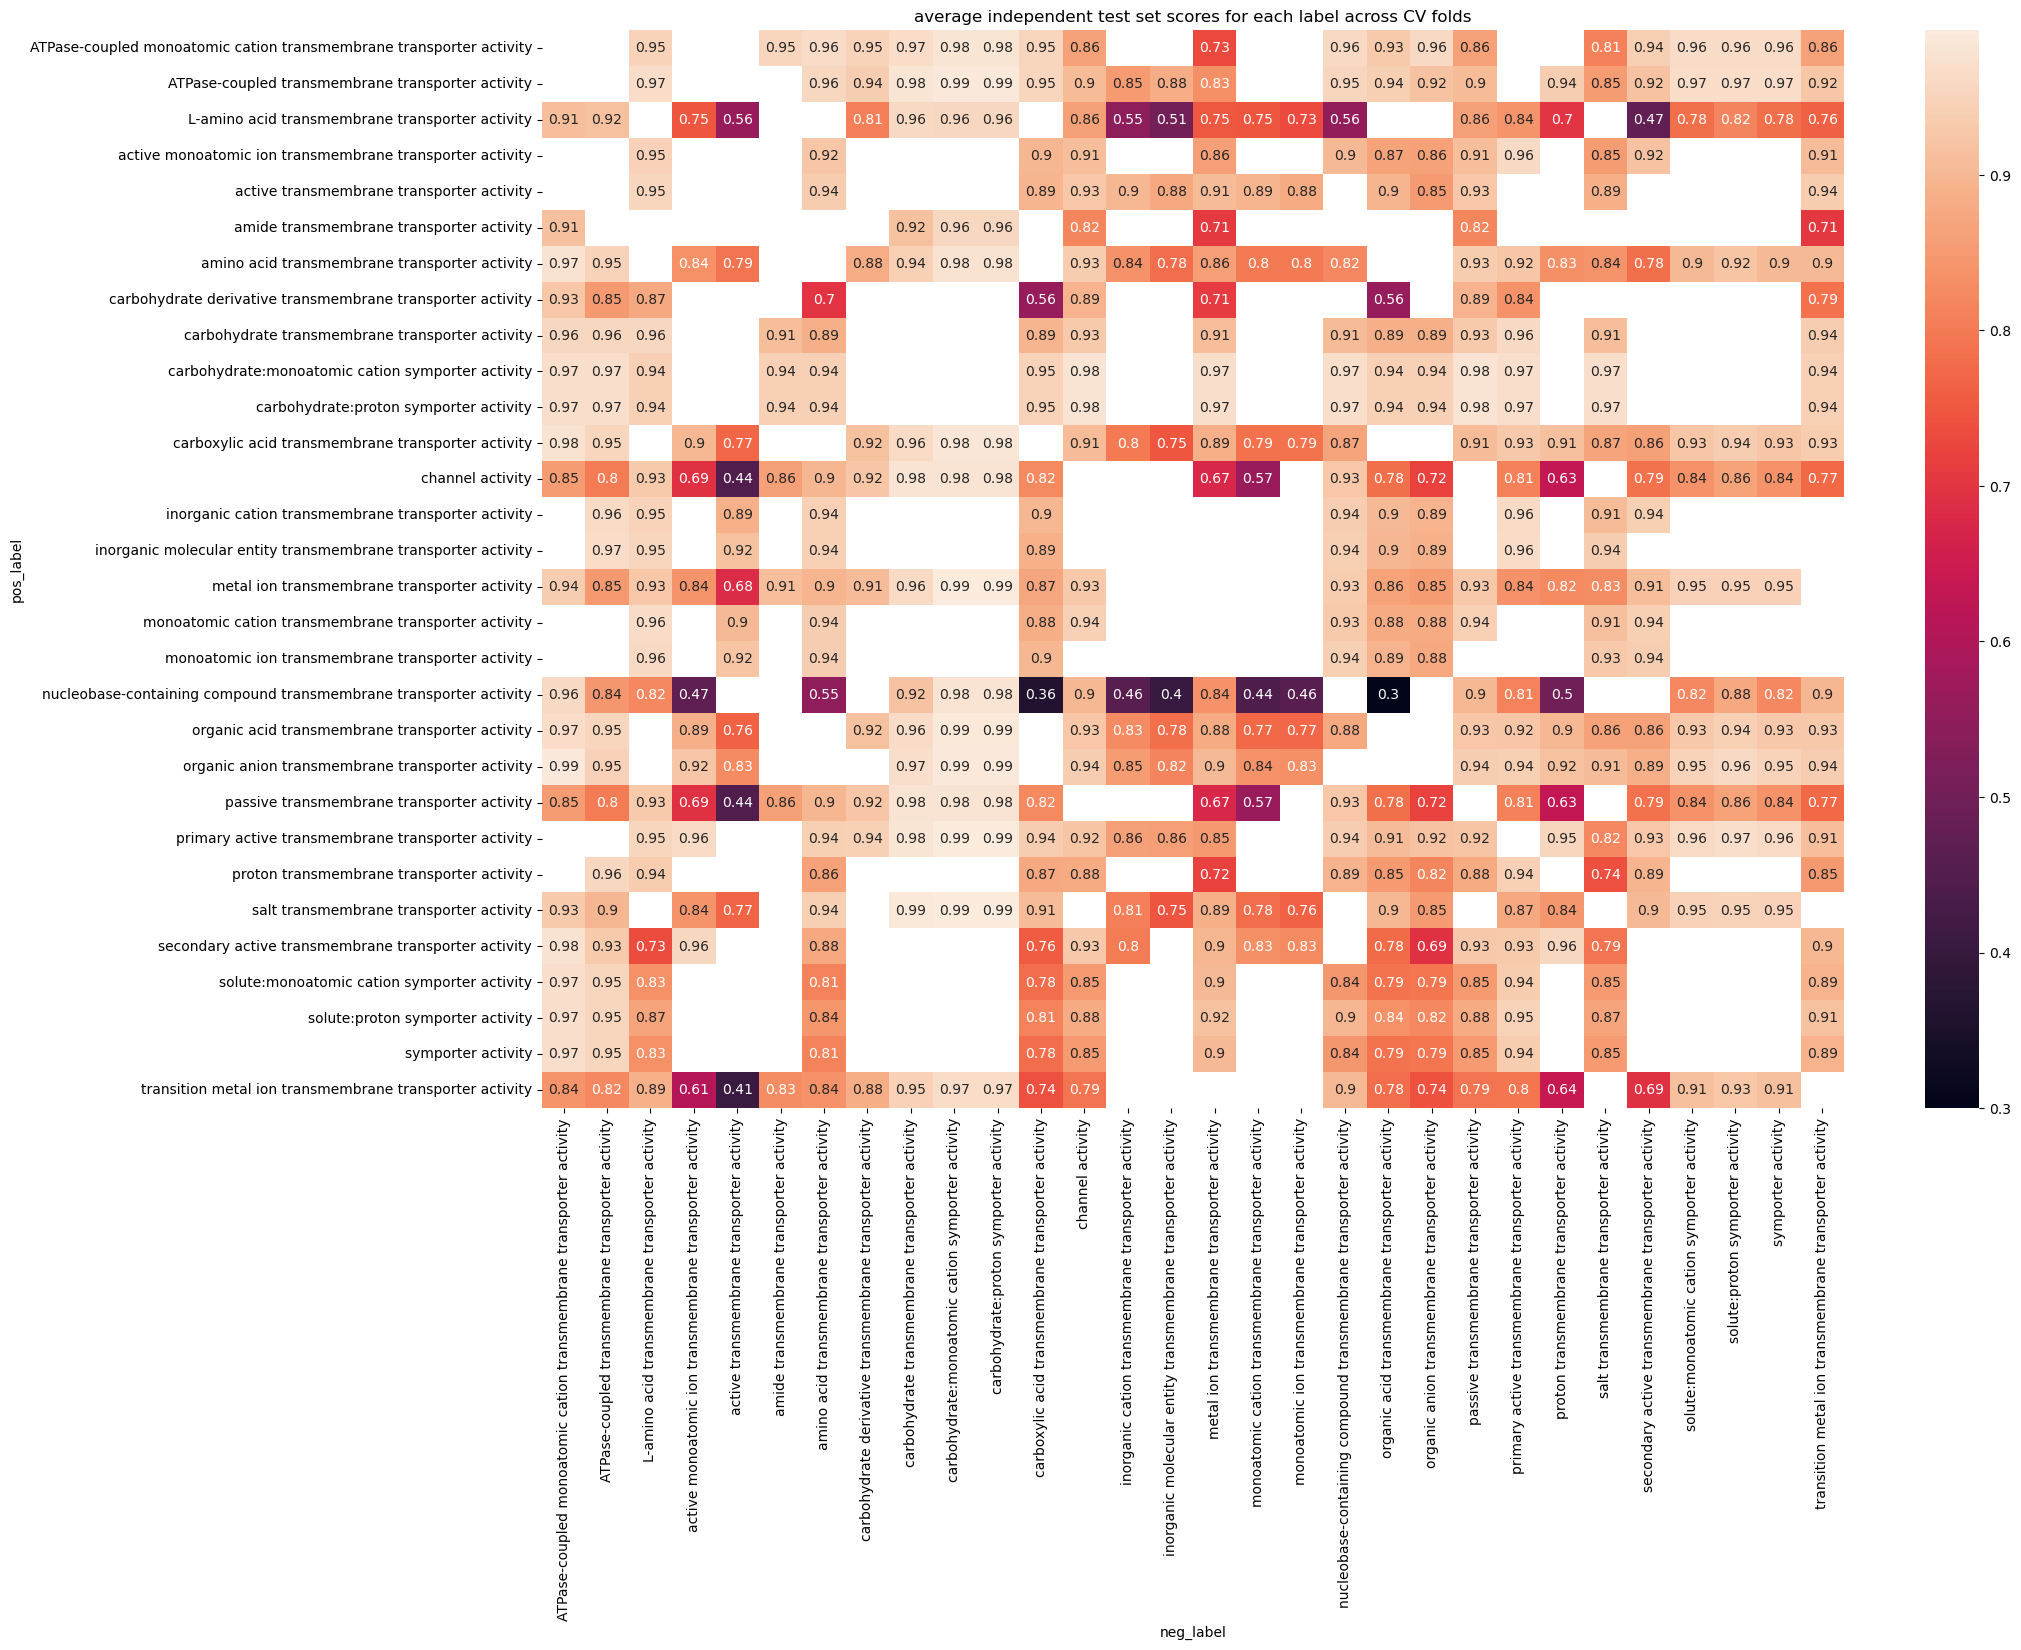

In [48]:
plot_results_as_heatmap(
    df_test, title="average independent test set scores for each label across CV folds"
)

<Axes: title={'center': 'average independent test set scores for each label across CV folds, sorted'}, xlabel='neg_label', ylabel='pos_label'>

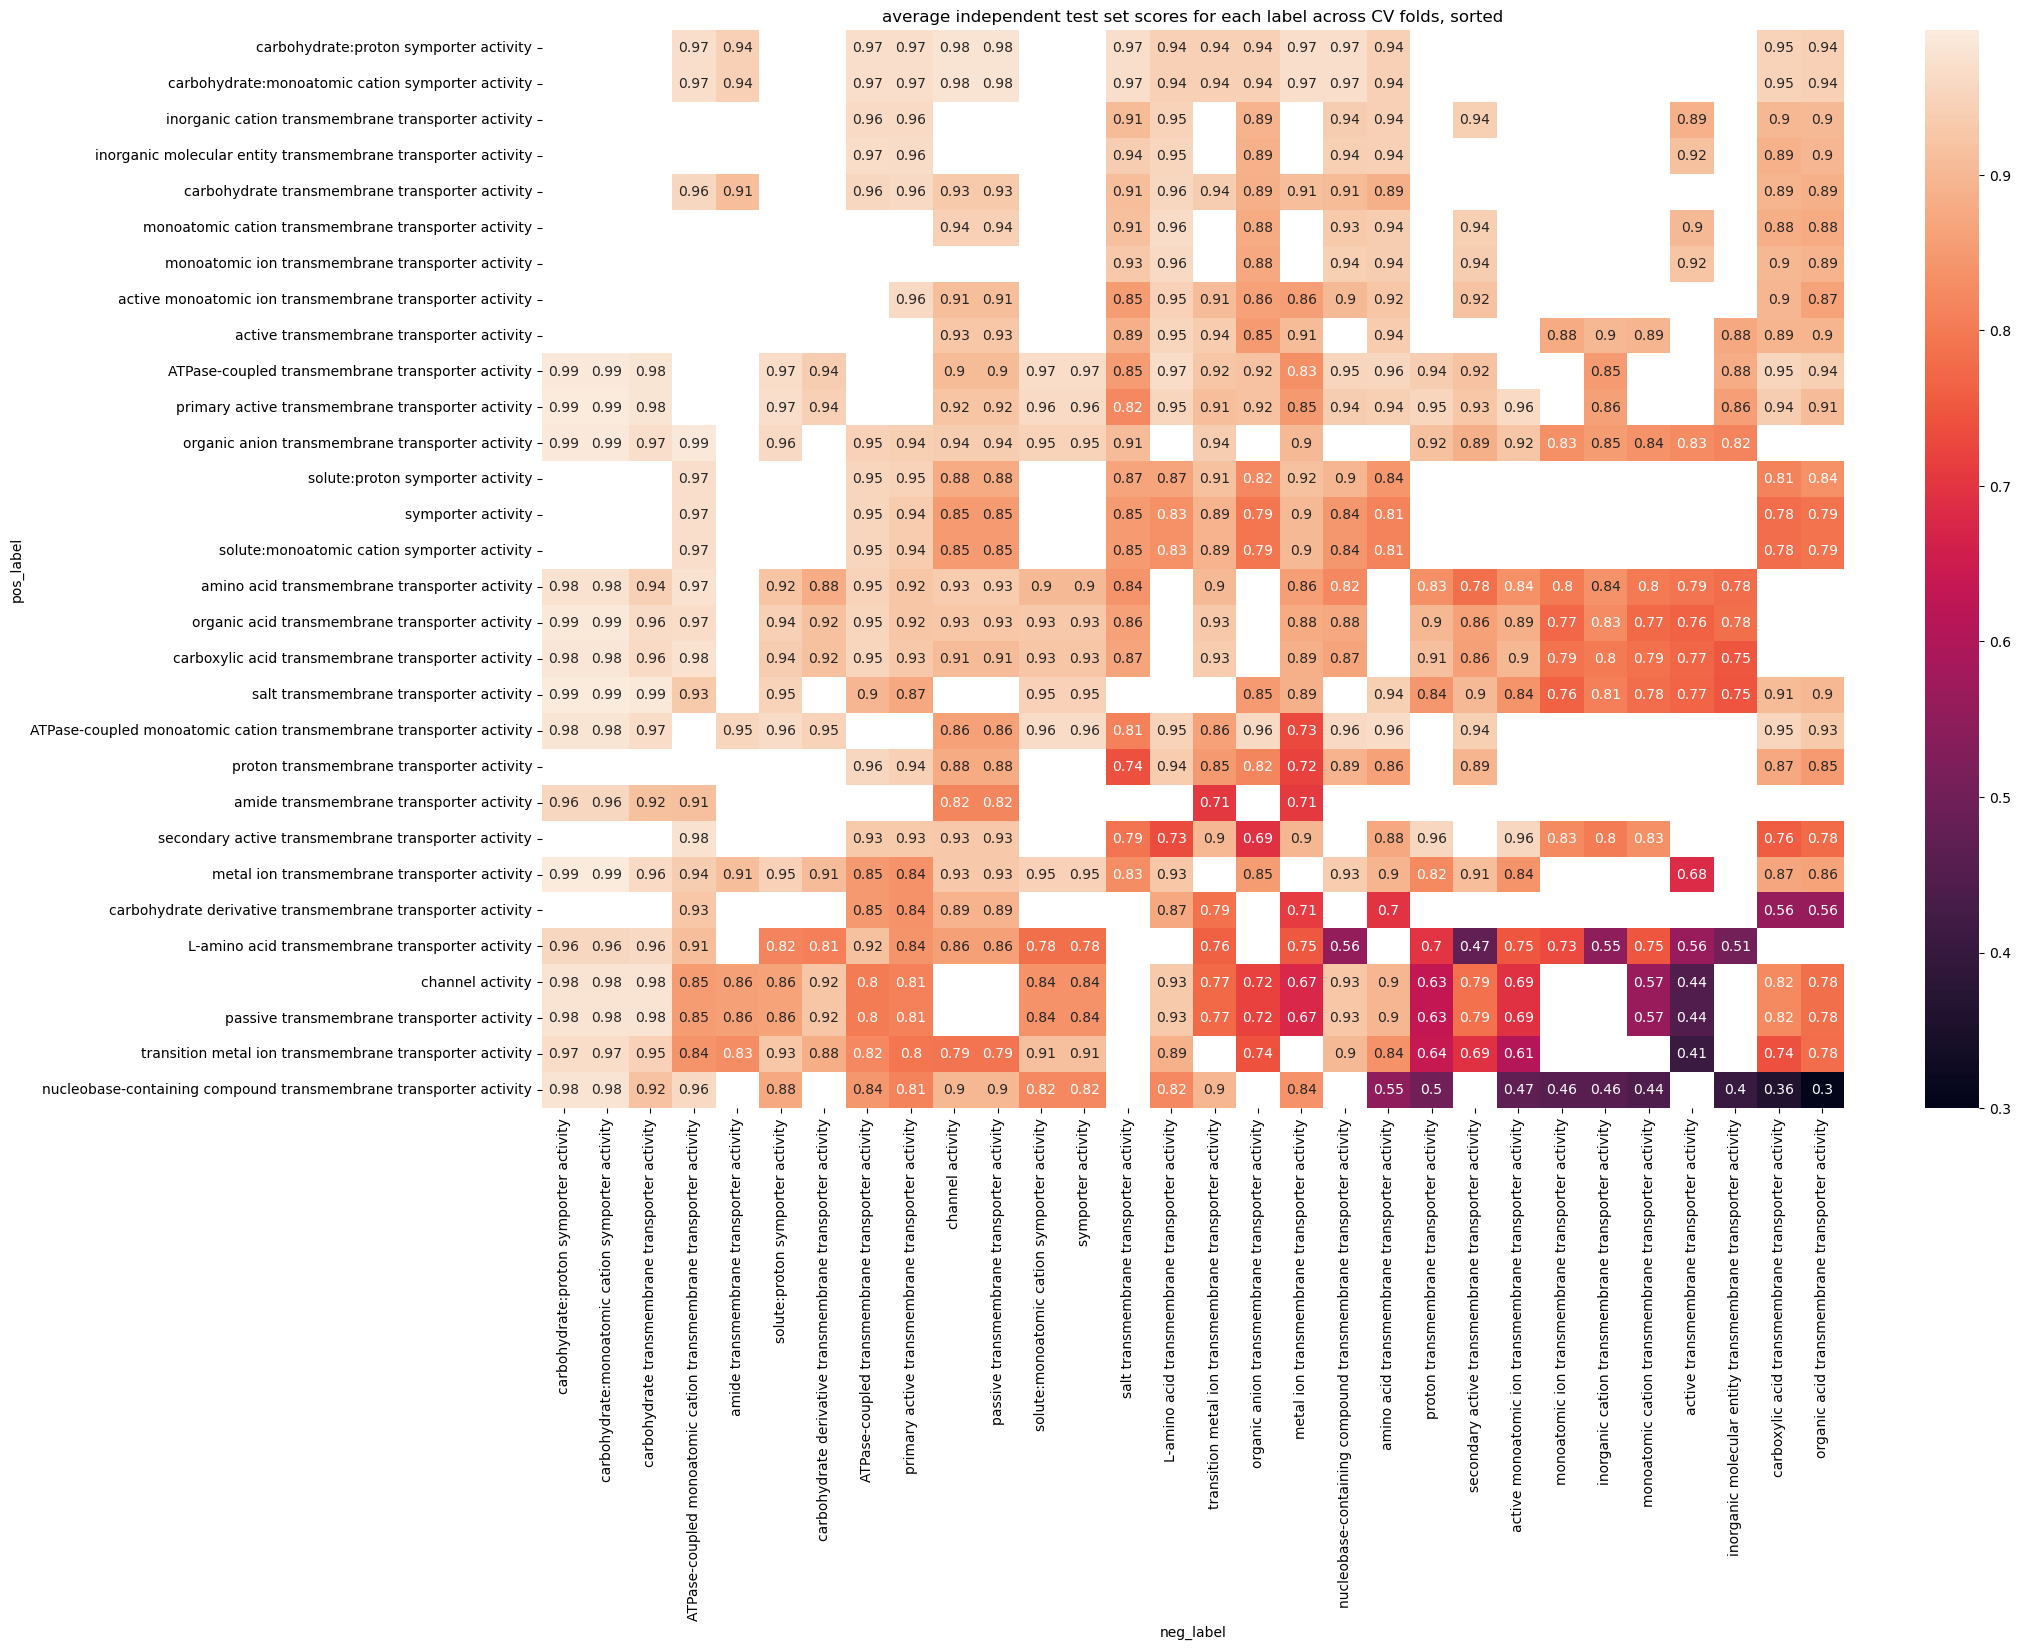

In [49]:
plot_results_as_heatmap(
    df_test,
    title="average independent test set scores for each label across CV folds, sorted",
    sort=True,
)

### GO

TN FP

FN TP


### ChEBI

Pairwise sequence sim

In [50]:
from subpred.fasta import write_fasta

fasta_test1 = [
    (">" + df_sequences.iloc[i].name, df_sequences.iloc[i].sequence)
    for i in range(0, 1)
]
fasta_test2 = [
    (">" + df_sequences.iloc[i].name, df_sequences.iloc[i].sequence)
    for i in range(1, 2)
]
fasta_test3 = [
    (">" + df_sequences.iloc[i].name, df_sequences.iloc[i].sequence)
    for i in range(0, 10)
]
write_fasta("../../test_files/fasta1.fasta", fasta_test1)
write_fasta("../../test_files/fasta2.fasta", fasta_test2)
write_fasta("../../test_files/fasta3.fasta", fasta_test3)

## R package 

In [32]:
from rpy2.robjects import r, packages, StrVector
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri


def get_pairwise_sequence_identities(
    series_sequences: pd.Series,
    substitution_matrix: str = "BLOSUM62",
    gap_opening: int = 10,
    gap_extension: int = 4,
    identity_calculation_method: str = "PID1",
) -> pd.DataFrame:
    """Uses R packages Biostrings and future.apply for fast, parallel computation
    of pairwise sequence identity scores from optimal global sequence alignments
    calculated with the Needleman-Wunsch algorithm.

    Args:
        series_sequences (pd.Series): Series with identifiers as index and sequences as values
        substitution_matrix (str, optional): PAM or BLOSUM matrix.
            Options: "BLOSUM45", "BLOSUM50", "BLOSUM62", "BLOSUM80", "BLOSUM100",
                "PAM30", "PAM40", "PAM70", "PAM120", "PAM250".
            Defaults to "BLOSUM62".
        gap_opening (int, optional): penalty for gap opening during alignment. Defaults to 10.
        gap_extension (int, optional): penalty for gap extension during alignment. Defaults to 4.
        identity_calculation_method (str, optional):
            "PID1":100 * (identical positions) / (aligned positions + internal gap positions)

            "PID2":100 * (identical positions) / (aligned positions)

            "PID3":100 * (identical positions) / (length shorter sequence)

            "PID4":100 * (identical positions) / (average length of the two sequences)

            Defaults to "PID1".
    Returns:
        pd.DataFrame: Sequence identity scores.
    """
    packages.importr("Biostrings")
    packages.importr("future.apply")
    r(
        """
        pairwiseAlignmentIdentityBatch <- function( 
            subject, 
            patterns, 
            ...
        ){
            # to parallelize outer loop
            alignments <- pairwiseAlignment(
                pattern=patterns, 
                subject=subject,
                ...
            )
            return (alignments)  
        }
        pairwiseAlignmentsList <- function(
            sequences,
            type="global", # Needleman-Wunsch. "local" for smith-waterman
            substitutionMatrix="BLOSUM62",
            gapOpening=10, 
            gapExtension=4
        ){
            # TODO would scale better if not re-calculating symmetrical scores
            plan(multicore)  # uses process fork, on windows use multisession (slower)
            alignments_list <- future_lapply(
                sequences, 
                pairwiseAlignmentIdentityBatch, 
                patterns=sequences, 
                type=type, 
                substitutionMatrix=substitutionMatrix, 
                gapOpening=gapOpening, 
                gapExtension=gapExtension
            )
            return (alignments_list)
        }
        calculateIdentitiesMatrix <- function(alignmentList, accessions, pidType="PID1"){
            identities <- lapply(alignmentList, pid, type=pidType)
            df_identities <- as.data.frame(identities, row.names=accessions, col.names=accessions)
            return (df_identities)
        }
        calculateScoresMatrix <- function(alignmentList, accessions){
            scores <- lapply(alignmentList, score)
            df_scores <- as.data.frame(scores, row.names=accessions, col.names=accessions)
            return (df_scores)
        }
        
    """
    )

    pairwise_alignments_list = r["pairwiseAlignmentsList"]
    calculate_identities_matrix = r["calculateIdentitiesMatrix"]
    calculate_scores_matrix = r["calculateScoresMatrix"]
    # parameter "local" does not make sense here, as local alignments usually have sequence identity of around 100%.
    # local would only make sense together with score() instead of pid()
    alignments_list = pairwise_alignments_list(
        sequences=StrVector(series_sequences.values),
        substitutionMatrix=substitution_matrix,
        gapOpening=gap_opening,
        gapExtension=gap_extension,
    )
    df_identity_r = calculate_identities_matrix(
        alignmentList=alignments_list,
        accessions=StrVector(series_sequences.index),
        pidType=identity_calculation_method,
    )
    df_scores_r = calculate_scores_matrix(
        alignmentList=alignments_list, accessions=StrVector(series_sequences.index)
    )

    with (ro.default_converter + pandas2ri.converter).context():
        df_protein_identity = ro.conversion.get_conversion().rpy2py(df_identity_r)
        df_protein_alignment_scores = ro.conversion.get_conversion().rpy2py(df_scores_r)

    return df_protein_identity, df_protein_alignment_scores

In [33]:
def get_sequence_series(df_uniprot_goa: pd.DataFrame, exclude_iea: bool = True):
    df_uniprot_goa_copy = df_uniprot_goa.copy(deep=True)

    if exclude_iea:
        df_uniprot_goa_copy = df_uniprot_goa[df_uniprot_goa.evidence_code != "IEA"]
    # go_ids_unique = sorted(df_uniprot_goa_copy.go_id_ancestor.unique())
    go_to_proteins = (
        df_uniprot_goa_copy[["Uniprot", "go_id_ancestor"]]
        .groupby("go_id_ancestor")
        .apply(lambda x: set(x.Uniprot))
        .to_dict()
    )
    series_sequences = (
        df_sequences.loc[df_uniprot_goa_copy.Uniprot.unique()]
        .sequence.drop_duplicates()
        .sort_index()
    )
    return series_sequences, go_to_proteins

In [34]:
def get_go_sequence_identity_score(
    df_protein_alignment_scores,
    df_protein_identity,
    go_term1: str,
    go_term2: str,
    aggr_method: str = None,
    measure: str = "identity",
):
    methods = {"max", "mean", "median", "min", None}
    measures = {"identity", "score"}

    assert aggr_method in methods
    assert measure in measures

    protein_set1, protein_set2 = go_to_proteins[go_term1], go_to_proteins[go_term2]

    records = list()
    for prot1 in protein_set1:
        for prot2 in protein_set2:
            alignment_score = df_protein_alignment_scores.at[prot1, prot2]
            identity = df_protein_identity.at[prot1, prot2]
            records.append([prot1, prot2, alignment_score, identity])

    df_records = pd.DataFrame.from_records(
        records, columns=["protein1", "protein2", "score", "identity"]
    )
    df_return = df_records.pivot(index="protein1", columns="protein2", values=measure)
    match aggr_method:
        case "max":
            return df_return.max(axis=None)
        case "mean":
            return df_return.mean(axis=None)
        case "median":
            return df_return.median(axis=None)
        case "min":
            return df_return.min(axis=None)
        case None:
            return df_return
        case _:
            raise ValueError()

In [35]:
series_sequences, go_to_proteins = get_sequence_series(df_uniprot_goa=df_uniprot_goa)
df_protein_identity, df_protein_alignment_scores = get_pairwise_sequence_identities(
    series_sequences=series_sequences
)
# TODO give df directly, instead of measure parameter
get_go_sequence_identity_score(
    df_protein_identity,
    df_protein_alignment_scores,
    "GO:0005347",
    "GO:0005471",
    None,
    "score",
)
# TODO method that takes df_uniprot_goa and calculates this for all. different order.

# TODO apply aggr after.

protein2      D6W196      P04710      P18238      P18239
protein1                                                
D6W196    100.000000   16.492693   17.373737   16.910230
P04710     16.492693  100.000000   74.110032   75.548589
P18238     17.373737   74.110032  100.000000   87.106918
P18239     16.910230   75.548589   87.106918  100.000000
Q06497     15.010142   21.005917   17.994100   18.421053

In [36]:
df_protein_identity

D6W196      P00163      P00830      P04710      P04817     P04840  \
D6W196  100.000000   13.562753   11.627907   16.492693   13.874788  15.587045   
P00163   13.562753  100.000000   13.111546   16.103896   13.389831  15.245478   
P00830   11.627907   13.111546  100.000000   15.264188   14.382403  15.966387   
P04710   16.492693   16.103896   15.264188  100.000000   15.482696  16.558442   
P04817   13.874788   13.389831   14.382403   15.482696  100.000000  12.372881   
...            ...         ...         ...         ...         ...        ...   
Q3E7B6    4.858300    7.792208    5.283757    8.737864    5.254237   8.480565   
Q99257   13.810316   12.333333   13.666667   13.752122   12.418301  15.452931   
Q99271   11.472081    9.949239   13.850997    9.939148   13.576494   9.238579   
Q99297   16.592920   15.544041   15.655577   23.417722   14.555766  14.563107   
Q99385   14.171657   14.009662   14.822134   15.048544   16.977929  13.868613   

           P05030     P06775     P07143     P08067  ...     Q12424     Q12436  \
D6W196  12.636166  14.403974  13.552361  11.336032  ...  13.892529  12.650602   
P00163  10.964912  16.610169  14.766839  14.545455  ...  13.666229  13.443396   
P00830  12.418301  14.382403  15.459883  12.574850  ...  14.173228  13.698630   
P04710  10.762332  14.096186  12.341772  15.384615  ...  13.049645  15.801887   
P04817  15.250545  30.278232  13.448276  11.864407  ...  14.790576  12.711864   
...           ...        ...        ...        ...  ...        ...        ...   
Q3E7B6   3.376906   4.975124   8.090615   9.767442  ...   4.125178  11.904762   
Q99257  13.725490  11.563518  12.186978  11.434109  ...  15.203145  12.773109   
Q99271  13.869347  13.807107   9.238579   7.987552  ...  14.184397  11.979695   
Q99297  10.568182  14.210526  12.380952  12.542373  ...  11.857143  15.291262   
Q99385  13.163717  14.659686  15.841584  13.520408  ...  12.335958  14.452214   

           Q12520     Q12691     Q12697      Q3E7B6      Q99257      Q99271  \
D6W196  14.372470  12.190651  10.461957    4.858300   13.810316   11.472081   
P00163  16.795866   9.807516   8.827684    7.792208   12.333333    9.949239   
P00830  15.068493  12.891344  10.461957    5.283757   13.666667   13.850997   
P04710  13.569322   9.695817   7.671233    8.737864   13.752122    9.939148   
P04817  13.389831  15.215399  12.355737    5.254237   12.418301   13.576494   
...           ...        ...        ...         ...         ...         ...   
Q3E7B6   9.036145   2.658112   2.101449  100.000000    4.909091    3.350254   
Q99257  13.232831  13.840513  11.073370    4.909091  100.000000   12.271805   
Q99271  10.245902  13.611615  14.004079    3.350254   12.271805  100.000000   
Q99297  11.730205   9.074244   7.255305    6.514658   12.186978    9.949239   
Q99385  13.868613  10.907424   9.655172    8.049536   14.043993   11.359026   

            Q99297      Q99385  
D6W196   16.592920   14.171657  
P00163   15.544041   14.009662  
P00830   15.655577   14.822134  
P04710   23.417722   15.048544  
P04817   14.555766   16.977929  
...            ...         ...  
Q3E7B6    6.514658    8.049536  
Q99257   12.186978   14.043993  
Q99271    9.949239   11.359026  
Q99297  100.000000   14.878049  
Q99385   14.878049  100.000000  

[298 rows x 298 columns]

In [37]:
df_protein_alignment_scores

D6W196  P00163  P00830  P04710  P04817  P04840  P05030  P06775  \
D6W196  2615.0  -537.0  -292.0  -631.0  -518.0  -821.0 -1660.0  -562.0   
P00163  -537.0  2021.0  -560.0  -375.0  -793.0  -435.0 -2039.0  -827.0   
P00830  -292.0  -560.0  2549.0  -783.0  -447.0  -882.0 -1563.0  -464.0   
P04710  -631.0  -375.0  -783.0  1584.0 -1052.0  -201.0 -2299.0 -1126.0   
P04817  -518.0  -793.0  -447.0 -1052.0  3085.0 -1155.0 -1263.0   714.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
Q3E7B6 -1666.0 -1196.0 -1728.0  -916.0 -2014.0  -813.0 -3314.0 -2054.0   
Q99257  -517.0  -863.0  -482.0 -1128.0  -347.0 -1175.0 -1240.0  -374.0   
Q99271 -1933.0 -2311.0 -1813.0 -2609.0 -1566.0 -2697.0  -680.0 -1513.0   
Q99297  -683.0  -367.0  -781.0   117.0 -1064.0  -180.0 -2318.0 -1132.0   
Q99385  -458.0  -187.0  -440.0  -453.0  -683.0  -530.0 -1846.0  -759.0   

        P07143  P08067  ...  Q12424  Q12436  Q12520  Q12691  Q12697  Q3E7B6  \
D6W196  -769.0 -1054.0  ... -1097.0  -442.0  -637.0 -2251.0 -3727.0 -1666.0   
P00163  -389.0  -661.0  ... -1377.0  -312.0  -244.0 -2695.0 -4151.0 -1196.0   
P00830  -792.0 -1122.0  ...  -999.0  -472.0  -679.0 -2186.0 -3644.0 -1728.0   
P04710  -196.0  -424.0  ... -1739.0  -486.0  -243.0 -2954.0 -4484.0  -916.0   
P04817 -1079.0 -1443.0  ...  -721.0  -713.0  -979.0 -1894.0 -3315.0 -2014.0   
...        ...     ...  ...     ...     ...     ...     ...     ...     ...   
Q3E7B6  -921.0  -560.0  ... -2701.0 -1365.0 -1042.0 -4011.0 -5539.0   376.0   
Q99257 -1136.0 -1467.0  ...  -703.0  -740.0 -1011.0 -1857.0 -3312.0 -2036.0   
Q99271 -2596.0 -2971.0  ... -1039.0 -2133.0 -2484.0  -759.0 -1962.0 -3578.0   
Q99297  -174.0  -401.0  ... -1736.0  -494.0  -230.0 -2991.0 -4499.0  -903.0   
Q99385  -458.0  -771.0  ... -1328.0  -177.0  -336.0 -2595.0 -3996.0 -1328.0   

        Q99257  Q99271  Q99297  Q99385  
D6W196  -517.0 -1933.0  -683.0  -458.0  
P00163  -863.0 -2311.0  -367.0  -187.0  
P00830  -482.0 -1813.0  -781.0  -440.0  
P04710 -1128.0 -2609.0   117.0  -453.0  
P04817  -347.0 -1566.0 -1064.0  -683.0  
...        ...     ...     ...     ...  
Q3E7B6 -2036.0 -3578.0  -903.0 -1328.0  
Q99257  3069.0 -1508.0 -1120.0  -773.0  
Q99271 -1508.0  5091.0 -2622.0 -2223.0  
Q99297 -1120.0 -2622.0  1581.0  -444.0  
Q99385  -773.0 -2223.0  -444.0  2052.0  

[298 rows x 298 columns]